In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import math
import os #<- package used to work with system file paths
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- another package used to plot graphs
from itertools import cycle #<- package used to iterate down rows (used in step 5 to add tap column)
import ipywidgets as widgets #<- widget tool to generate button and tab for graphs
from IPython.display import display #<- displays widgets
from tkinter import Tk, filedialog #<- Tkinter is a GUI package
import pingouin as pg
from pingouin import ttest
from scipy.stats import ttest_ind
print("done step 1")

done step 1


# PD Data ONLY

In [136]:
PD_tap=pd.read_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/hab_output.csv')
PD_tap = PD_tap.iloc[: , 1:]
PD_baseline=pd.read_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/baseline_output.csv')
PD_baseline = PD_baseline.iloc[: , 1:]
PD_baseline = PD_baseline.drop(columns=["plate", "Tap", "Puff", "x","y"])
print(PD_tap)
print(PD_baseline)

           time  dura   dist      prob     speed  plate  taps        dataset  \
0       599.983  2.64  0.739  0.945946  0.279924      1   1.0  F53B2.5_ok226   
1       609.995  2.66  0.834  0.857143  0.313534      1   2.0  F53B2.5_ok226   
2       619.933  2.48  0.759  0.833333  0.306048      1   3.0  F53B2.5_ok226   
3       629.932  2.19  0.649  0.901961  0.296347      1   4.0  F53B2.5_ok226   
4       639.991  2.06  0.589  0.787234  0.285922      1   5.0  F53B2.5_ok226   
...         ...   ...    ...       ...       ...    ...   ...            ...   
10656   859.988  0.46  0.058  0.142857  0.126087      6  27.0  vps-35_ok1880   
10657   869.982  0.44  0.083  0.500000  0.188636      6  28.0  vps-35_ok1880   
10658   879.958  0.73  0.158  0.538462  0.216438      6  29.0  vps-35_ok1880   
10659   889.995  0.59  0.114  0.333333  0.193220      6  30.0  vps-35_ok1880   
10660  1189.993  3.52  0.740  0.181818  0.210227      6  31.0  vps-35_ok1880   

          Gene  Allele  
0      F53B2.5

In [5]:
PD_baseline_last100=PD_baseline[((PD_baseline.Time<=590)&(PD_baseline.Time >=490))]
PD_baseline_last100=PD_baseline_last100.reset_index()
print(PD_baseline_last100)

          index     Time   n  Number  Instantaneous Speed  Interval Speed  \
0          6452  490.037  68      45               0.1218          0.0904   
1          6453  490.087  69      45               0.1394          0.1048   
2          6454  490.173  69      45               0.1077          0.0830   
3          6455  490.250  69      45               0.1171          0.0866   
4          6456  490.329  68      45               0.1234          0.0901   
...         ...      ...  ..     ...                  ...             ...   
598967  7224103  589.629  75      49               0.0359          0.0382   
598968  7224104  589.710  75      49               0.0328          0.0441   
598969  7224105  589.789  76      49               0.0310          0.0378   
598970  7224106  589.930  76      49               0.0394          0.0461   
598971  7224107  589.990  76      49               0.0398          0.0543   

         Bias   Width  Length      Area  Angular Speed  Aspect Ratio  Kink 

In [6]:
tt=ttest_ind(PD_baseline_last100["Bias"], PD_baseline_last100[PD_baseline_last100.dataset=="N2"]["Bias"],equal_var=False)
print(tt)

Ttest_indResult(statistic=103.24670243606379, pvalue=0.0)


In [14]:
list=PD_baseline_last100["dataset"].unique()
print(list)

['F53B2.5_ok226' 'glo-1_tm15275' 'hipr-1_tm2207' 'dop-3_tm1356'
 'dop-1_vs101' 'gck-3_tm1223' 'hipr-1_ok1081' 'sipa-1_ok879'
 'gba-3_gk3287' 'cat-1_e1111' 'pink-1_ok3538' 'djr-1.2_tm1346'
 'pink-1_tm1779' 'cat-2_n4547' 'bas-1_tm351' 'gba-2_tm4808' 'pdr-1_tm395'
 'glo-1_zu391' 'gba-1_tm3816' 'set-2_ok952' 'unc-10_ad591' 'snb-5_ok1434'
 'cat-1_ok411' 'N2' 'src-1_ok2685' 'pdr-1_tm598' 'let-19_gk149538'
 'lrk-1_tm1898' 'cat-2_e1112' 'dat-1_ok157' 'sac-2_ok2743' 'lrk-1_tm7568'
 'dpy-22_e652' 'unc-59_e1005' 'bas-1_ad446' 'gba-3_tm3302' 'pdr-1_gk448'
 'Y18D10A.22_ok3535' 'vps-35_ok1880' 'gck-3_tm1296' 'dpy-22_tm12356'
 'cat-2_tm2261' 'dop-3_ok295' 'glo-1_tm3240' 'pgrn-1_tm985' 'dpy-22_sy622'
 'gba-2_tm4623' 'hipr-1_tm10120' 'cpr-1_ok1344' 'unc-59_e261']


In [23]:
def TTest_New(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
        row=[a, Tstat]
        output.loc[len(output)]=row
    print(output)

In [56]:
PD_baseline_instantspeed_T=pd.DataFrame(columns = ["dataset","Instantaneous Speed"])
PD_baseline_intspeed_T=pd.DataFrame(columns = ["dataset","Interval Speed"])
PD_baseline_bias_T=pd.DataFrame(columns = ["dataset","Bias"])
PD_baseline_width_T=pd.DataFrame(columns = ["dataset","Width"])
PD_baseline_length_T=pd.DataFrame(columns = ["dataset","Length"])
PD_baseline_area_T=pd.DataFrame(columns = ["dataset","Area"])
PD_baseline_angularspeed_T=pd.DataFrame(columns = ["dataset","Angular Speed"])
PD_baseline_aspectratio_T=pd.DataFrame(columns = ["dataset","Aspect Ratio"])
PD_baseline_kink_T=pd.DataFrame(columns = ["dataset","Kink"])
PD_baseline_curve_T=pd.DataFrame(columns = ["dataset","Curve"])
PD_baseline_crab_T=pd.DataFrame(columns = ["dataset","Crab"])

In [57]:
TTest_New(PD_baseline_last100["dataset"].unique(), "Instantaneous Speed", PD_baseline_last100, PD_baseline_instantspeed_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Interval Speed", PD_baseline_last100, PD_baseline_intspeed_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Bias", PD_baseline_last100, PD_baseline_bias_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Width", PD_baseline_last100, PD_baseline_width_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Length", PD_baseline_last100, PD_baseline_length_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Area", PD_baseline_last100, PD_baseline_area_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Angular Speed", PD_baseline_last100, PD_baseline_angularspeed_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Aspect Ratio", PD_baseline_last100, PD_baseline_aspectratio_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Kink", PD_baseline_last100, PD_baseline_kink_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Curve", PD_baseline_last100, PD_baseline_curve_T)
TTest_New(PD_baseline_last100["dataset"].unique(), "Crab", PD_baseline_last100, PD_baseline_crab_T)

              dataset  Instantaneous Speed
0       F53B2.5_ok226           367.819620
1       glo-1_tm15275          -123.327131
2       hipr-1_tm2207           -36.932369
3        dop-3_tm1356           113.773464
4         dop-1_vs101           111.360792
5        gck-3_tm1223          -119.096218
6       hipr-1_ok1081           -21.443275
7        sipa-1_ok879            20.407731
8        gba-3_gk3287            19.649219
9         cat-1_e1111            77.424697
10      pink-1_ok3538          -311.988341
11     djr-1.2_tm1346           -85.295024
12      pink-1_tm1779           -19.119068
13        cat-2_n4547           233.882587
14        bas-1_tm351           377.001748
15       gba-2_tm4808           -90.672632
16        pdr-1_tm395          -101.160459
17        glo-1_zu391          -155.829942
18       gba-1_tm3816          -192.355450
19        set-2_ok952          -227.441895
20       unc-10_ad591           -15.220599
21       snb-5_ok1434            49.492619
22        c

In [37]:
print(PD_baseline_intspeed_T.iloc[:,1])

NameError: name 'PD_baseline_intpeed_T' is not defined

In [58]:
PD_baseline_Tstats=PD_baseline_instantspeed_T
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_intspeed_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_bias_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_width_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_length_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_area_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_angularspeed_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_kink_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_curve_T.iloc[:,1])
PD_baseline_Tstats=PD_baseline_Tstats.join(PD_baseline_crab_T.iloc[:,1])
print(PD_baseline_Tstats)

              dataset  Instantaneous Speed  Interval Speed        Bias  \
0       F53B2.5_ok226           367.819620      205.385004  368.466741   
1       glo-1_tm15275          -123.327131      -87.637457 -101.701530   
2       hipr-1_tm2207           -36.932369      -27.863024    0.893047   
3        dop-3_tm1356           113.773464      157.809722   98.948062   
4         dop-1_vs101           111.360792       -6.158491  169.774852   
5        gck-3_tm1223          -119.096218     -117.295586  -97.928899   
6       hipr-1_ok1081           -21.443275        4.364800  -48.243286   
7        sipa-1_ok879            20.407731       31.698671   -7.889296   
8        gba-3_gk3287            19.649219       10.026159   11.625786   
9         cat-1_e1111            77.424697       84.803723   80.820157   
10      pink-1_ok3538          -311.988341     -295.330406  -33.789555   
11     djr-1.2_tm1346           -85.295024      -75.395277  -50.952329   
12      pink-1_tm1779           -19.11

In [59]:
PD_baseline_Tstats=PD_baseline_Tstats.set_index("dataset")
print(PD_baseline_Tstats)

                   Instantaneous Speed  Interval Speed        Bias  \
dataset                                                              
F53B2.5_ok226               367.819620      205.385004  368.466741   
glo-1_tm15275              -123.327131      -87.637457 -101.701530   
hipr-1_tm2207               -36.932369      -27.863024    0.893047   
dop-3_tm1356                113.773464      157.809722   98.948062   
dop-1_vs101                 111.360792       -6.158491  169.774852   
gck-3_tm1223               -119.096218     -117.295586  -97.928899   
hipr-1_ok1081               -21.443275        4.364800  -48.243286   
sipa-1_ok879                 20.407731       31.698671   -7.889296   
gba-3_gk3287                 19.649219       10.026159   11.625786   
cat-1_e1111                  77.424697       84.803723   80.820157   
pink-1_ok3538              -311.988341     -295.330406  -33.789555   
djr-1.2_tm1346              -85.295024      -75.395277  -50.952329   
pink-1_tm1779       

In [119]:
PD_baseline_Tstats_sort=PD_baseline_Tstats.sort_index()
print(PD_baseline_Tstats_sort)

                   Instantaneous Speed  Interval Speed        Bias  \
dataset                                                              
F53B2.5_ok226               367.819620      205.385004  368.466741   
N2                            0.000000        0.000000    0.000000   
Y18D10A.22_ok3535            37.754899       30.647183  113.399707   
bas-1_ad446                 211.029216      259.672841  191.911302   
bas-1_tm351                 377.001748      295.046594  426.748158   
cat-1_e1111                  77.424697       84.803723   80.820157   
cat-1_ok411                 168.018468      269.767230  152.021807   
cat-2_e1112                 199.269528      171.704802  207.435854   
cat-2_n4547                 233.882587      253.642864  197.427229   
cat-2_tm2261                164.198295      134.759116   72.200132   
cpr-1_ok1344                 32.422585       -0.124890  -35.027597   
dat-1_ok157                 137.472635       57.890019   99.291015   
djr-1.2_tm1346      

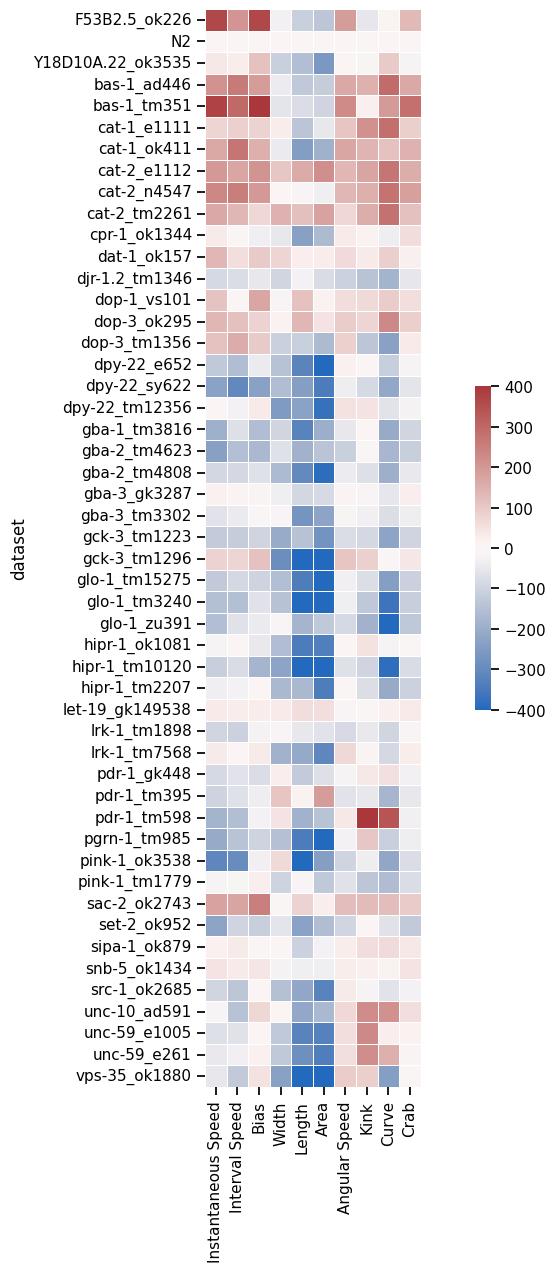

In [120]:
sns.set_context('notebook')
plt.figure(figsize=(14,14))
ax = sns.heatmap(data = PD_baseline_Tstats_sort, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
                 vmax=400,
                 vmin=-400, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
# plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=450)
plt.show()

In [137]:
print(PD_tap)
PD_first_tap = PD_tap[(PD_tap.taps==1)].reset_index().drop(columns="index")
PD_last_three_taps = PD_tap[((PD_tap.taps>=28)&(PD_tap.taps<=30))].reset_index().drop(columns="index")
PD_recov_taps = PD_tap[(PD_tap.taps==31)].reset_index().drop(columns="index")
print(PD_first_tap)
print(PD_last_three_taps)
print(PD_recov_taps)

           time  dura   dist      prob     speed  plate  taps        dataset  \
0       599.983  2.64  0.739  0.945946  0.279924      1   1.0  F53B2.5_ok226   
1       609.995  2.66  0.834  0.857143  0.313534      1   2.0  F53B2.5_ok226   
2       619.933  2.48  0.759  0.833333  0.306048      1   3.0  F53B2.5_ok226   
3       629.932  2.19  0.649  0.901961  0.296347      1   4.0  F53B2.5_ok226   
4       639.991  2.06  0.589  0.787234  0.285922      1   5.0  F53B2.5_ok226   
...         ...   ...    ...       ...       ...    ...   ...            ...   
10656   859.988  0.46  0.058  0.142857  0.126087      6  27.0  vps-35_ok1880   
10657   869.982  0.44  0.083  0.500000  0.188636      6  28.0  vps-35_ok1880   
10658   879.958  0.73  0.158  0.538462  0.216438      6  29.0  vps-35_ok1880   
10659   889.995  0.59  0.114  0.333333  0.193220      6  30.0  vps-35_ok1880   
10660  1189.993  3.52  0.740  0.181818  0.210227      6  31.0  vps-35_ok1880   

          Gene  Allele  
0      F53B2.5

In [138]:
print(PD_last_three_taps)

         time  dura   dist      prob     speed  plate  taps        dataset  \
0     869.937  1.26  0.235  0.226415  0.186508      1  28.0  F53B2.5_ok226   
1     879.933  0.94  0.141  0.226415  0.150000      1  29.0  F53B2.5_ok226   
2     889.960  2.77  0.701  0.230769  0.253069      1  30.0  F53B2.5_ok226   
3     869.996  0.98  0.211  0.377358  0.215306      2  28.0  F53B2.5_ok226   
4     879.964  1.58  0.396  0.305085  0.250633      2  29.0  F53B2.5_ok226   
...       ...   ...    ...       ...       ...    ...   ...            ...   
1030  879.977  1.77  0.246  0.135135  0.138983      5  29.0  vps-35_ok1880   
1031  889.987  1.27  0.156  0.352941  0.122835      5  30.0  vps-35_ok1880   
1032  869.982  0.44  0.083  0.500000  0.188636      6  28.0  vps-35_ok1880   
1033  879.958  0.73  0.158  0.538462  0.216438      6  29.0  vps-35_ok1880   
1034  889.995  0.59  0.114  0.333333  0.193220      6  30.0  vps-35_ok1880   

         Gene  Allele  
0     F53B2.5   ok226  
1     F53B2.5  

In [139]:
PD_final_taps=PD_last_three_taps.groupby(["Gene", "Allele", "dataset", "plate"]).mean().reset_index()
# print(PD_final_taps)
# print(PD_first_tap)
# print(PD_recov_taps)


In [140]:
PD_final_taps=PD_final_taps.rename(columns={"dura": "final_dura", "prob": "final_prob", "speed": "final_speed"}, errors="raise")
PD_first_tap=PD_first_tap.rename(columns={"dura": "init_dura", "prob": "init_prob", "speed": "init_speed"}, errors="raise")
print(PD_final_taps)
print(PD_first_tap)

        Gene  Allele        dataset  plate        time  final_dura      dist  \
0    F53B2.5   ok226  F53B2.5_ok226      1  879.943333    1.656667  0.359000   
1    F53B2.5   ok226  F53B2.5_ok226      2  879.960333    1.286667  0.281667   
2    F53B2.5   ok226  F53B2.5_ok226      3  879.983333    1.326667  0.302667   
3    F53B2.5   ok226  F53B2.5_ok226      4  879.966667    1.410000  0.372667   
4    F53B2.5   ok226  F53B2.5_ok226      5  879.968667    1.240000  0.278000   
..       ...     ...            ...    ...         ...         ...       ...   
339   vps-35  ok1880  vps-35_ok1880      2  879.981333    1.040000  0.170000   
340   vps-35  ok1880  vps-35_ok1880      3  879.956000    0.790000  0.148333   
341   vps-35  ok1880  vps-35_ok1880      4  879.977000    0.696667  0.145000   
342   vps-35  ok1880  vps-35_ok1880      5  879.975000    1.253333  0.166333   
343   vps-35  ok1880  vps-35_ok1880      6  879.978333    0.586667  0.118333   

     final_prob  final_speed  taps  
0 

In [153]:
PD_habit_levels = pd.merge(PD_first_tap, PD_final_taps, on =['dataset','plate','Gene','Allele'], how ='left')
PD_habit_levels = PD_habit_levels.dropna()
print(PD_habit_levels)

      time_x  init_dura  dist_x  init_prob  init_speed  plate  taps_x  \
0    599.983       2.64   0.739   0.945946    0.279924      1     1.0   
1    599.951       2.84   0.921   0.921569    0.324296      2     1.0   
2    599.967       3.64   1.246   0.947368    0.342308      3     1.0   
3    599.984       3.32   1.158   0.925000    0.348795      4     1.0   
4    599.953       3.02   1.003   0.883721    0.332119      5     1.0   
..       ...        ...     ...        ...         ...    ...     ...   
334  599.975       3.94   0.676   0.787879    0.171574      2     1.0   
335  599.990       3.06   0.547   0.615385    0.178758      3     1.0   
336  599.983       4.55   0.681   0.214286    0.149670      4     1.0   
337  599.955       2.99   0.455   0.500000    0.152174      5     1.0   
338  599.992       2.90   0.602   0.583333    0.207586      6     1.0   

           dataset     Gene  Allele      time_y  final_dura    dist_y  \
0    F53B2.5_ok226  F53B2.5   ok226  879.943333   

In [154]:
PD_habit_levels['habit_dura']=PD_habit_levels.init_dura-PD_habit_levels.final_dura
PD_habit_levels['habit_prob']=PD_habit_levels.init_prob-PD_habit_levels.final_prob
PD_habit_levels['habit_speed']=PD_habit_levels.init_speed-PD_habit_levels.final_speed
PD_habit_levels=PD_habit_levels.drop(columns=['time_x','time_y','taps_x','taps_y','dist_x','dist_y'])
# print(PD_habit_levels)
# print(PD_final_taps)
# print(PD_first_tap)
# print(PD_recov_taps)

In [195]:
PD_recov_taps=PD_recov_taps.rename(columns={"dura": "recov_dura", "prob": "recov_prob", "speed":"recov_speed"})
PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate','Gene','Allele'], how ='left')
PD_habituation = PD_habituation.dropna()
print(PD_habituation)

     init_dura  init_prob  init_speed  plate        dataset     Gene  Allele  \
0         2.64   0.945946    0.279924      1  F53B2.5_ok226  F53B2.5   ok226   
1         2.84   0.921569    0.324296      2  F53B2.5_ok226  F53B2.5   ok226   
2         3.64   0.947368    0.342308      3  F53B2.5_ok226  F53B2.5   ok226   
3         3.32   0.925000    0.348795      4  F53B2.5_ok226  F53B2.5   ok226   
4         3.02   0.883721    0.332119      5  F53B2.5_ok226  F53B2.5   ok226   
..         ...        ...         ...    ...            ...      ...     ...   
333       3.94   0.787879    0.171574      2  vps-35_ok1880   vps-35  ok1880   
334       3.06   0.615385    0.178758      3  vps-35_ok1880   vps-35  ok1880   
335       4.55   0.214286    0.149670      4  vps-35_ok1880   vps-35  ok1880   
336       2.99   0.500000    0.152174      5  vps-35_ok1880   vps-35  ok1880   
337       2.90   0.583333    0.207586      6  vps-35_ok1880   vps-35  ok1880   

     final_dura  final_prob  final_spee

In [227]:
PD_habituation['recovery_dura']=PD_habituation.init_dura-PD_habituation.recov_dura
PD_habituation['recovery_prob']=PD_habituation.init_prob-PD_habituation.recov_prob
PD_habituation['recovery_speed']=PD_habituation.init_speed-PD_habituation.recov_speed
print(PD_habituation)

     init_dura  init_prob  init_speed  plate        dataset     Gene  Allele  \
0         2.64   0.945946    0.279924      1  F53B2.5_ok226  F53B2.5   ok226   
1         2.84   0.921569    0.324296      2  F53B2.5_ok226  F53B2.5   ok226   
2         3.64   0.947368    0.342308      3  F53B2.5_ok226  F53B2.5   ok226   
3         3.32   0.925000    0.348795      4  F53B2.5_ok226  F53B2.5   ok226   
4         3.02   0.883721    0.332119      5  F53B2.5_ok226  F53B2.5   ok226   
..         ...        ...         ...    ...            ...      ...     ...   
333       3.94   0.787879    0.171574      2  vps-35_ok1880   vps-35  ok1880   
334       3.06   0.615385    0.178758      3  vps-35_ok1880   vps-35  ok1880   
335       4.55   0.214286    0.149670      4  vps-35_ok1880   vps-35  ok1880   
336       2.99   0.500000    0.152174      5  vps-35_ok1880   vps-35  ok1880   
337       2.90   0.583333    0.207586      6  vps-35_ok1880   vps-35  ok1880   

     final_dura  final_prob  final_spee

In [214]:
PD_habituation.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/test_hab_output.csv')

In [182]:
# print(PD_recov_taps)
# print(PD_first_tap)
# print(PD_final_taps)
# print(PD_habit_levels)
print(PD_habituation())

     init_dura  init_prob  init_speed  plate        dataset     Gene  Allele  \
0         2.64   0.945946    0.279924      1  F53B2.5_ok226  F53B2.5   ok226   
1         2.84   0.921569    0.324296      2  F53B2.5_ok226  F53B2.5   ok226   
2         3.64   0.947368    0.342308      3  F53B2.5_ok226  F53B2.5   ok226   
3         3.32   0.925000    0.348795      4  F53B2.5_ok226  F53B2.5   ok226   
4         3.02   0.883721    0.332119      5  F53B2.5_ok226  F53B2.5   ok226   
..         ...        ...         ...    ...            ...      ...     ...   
333       3.94   0.787879    0.171574      2  vps-35_ok1880   vps-35  ok1880   
334       3.06   0.615385    0.178758      3  vps-35_ok1880   vps-35  ok1880   
335       4.55   0.214286    0.149670      4  vps-35_ok1880   vps-35  ok1880   
336       2.99   0.500000    0.152174      5  vps-35_ok1880   vps-35  ok1880   
337       2.90   0.583333    0.207586      6  vps-35_ok1880   vps-35  ok1880   

     final_dura  final_prob  final_spee

In [100]:
# PD_habit_levels.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/TesteData.csv', sep=",")

In [228]:
print(PD_habituation[PD_habituation.dataset=='src-1_ok2685'])

     init_dura  init_prob  init_speed  plate       dataset   Gene  Allele  \
315       0.33        1.0    0.133333      3  src-1_ok2685  src-1  ok2685   

     final_dura  final_prob  final_speed  ...  habit_speed      time  \
315    0.153333    0.071429     0.383929  ...    -0.250595  1189.974   

     recov_dura   dist  recov_prob  recov_speed  taps  recovery_dura  \
315        1.06  0.086         0.2     0.081132  31.0          -0.73   

     recovery_prob  recovery_speed  
315            0.8        0.052201  

[1 rows x 22 columns]


In [229]:
PD_recovery_dura=pd.DataFrame(columns = ["dataset","Recovery Duration"])
PD_recovery_prob=pd.DataFrame(columns = ["dataset","Recovery Probability"])
PD_recovery_speed=pd.DataFrame(columns = ["dataset","Recovery Speed"])
PD_init_dura=pd.DataFrame(columns = ["dataset","Initial Duration"])
PD_init_prob=pd.DataFrame(columns = ["dataset","Initial Probability"])
PD_init_speed=pd.DataFrame(columns = ["dataset","Initial Speed"])
PD_final_dura=pd.DataFrame(columns = ["dataset","Final Duration"])
PD_final_prob=pd.DataFrame(columns = ["dataset","Final Probability"])
PD_final_speed=pd.DataFrame(columns = ["dataset","Final Speed"])
PD_hab_dura=pd.DataFrame(columns = ["dataset","Habituation of Duration"])
PD_hab_prob=pd.DataFrame(columns = ["dataset","Habituation of Probability"])
PD_hab_speed=pd.DataFrame(columns = ["dataset","Habituation of Speed"])
print('done')

done


In [212]:
# PD_recov_taps=PD_recov_taps.dropna()
# PD_first_tap=PD_first_tap.dropna()
# PD_final_taps=PD_final_taps.dropna()
# PD_habit_levels=PD_habit_levels.dropna()
PD_habituation=PD_habituation.dropna()

In [202]:
print(PD_habituation["dataset"].unique())

['F53B2.5_ok226' 'N2' 'Y18D10A.22_ok3535' 'bas-1_ad446' 'bas-1_tm351'
 'cat-1_e1111' 'cat-1_ok411' 'cat-2_e1112' 'cat-2_n4547' 'cat-2_tm2261'
 'cpr-1_ok1344' 'dat-1_ok157' 'djr-1.2_tm1346' 'dop-1_vs101' 'dop-3_ok295'
 'dop-3_tm1356' 'dpy-22_e652' 'dpy-22_sy622' 'dpy-22_tm12356'
 'gba-1_tm3816' 'gba-2_tm4623' 'gba-2_tm4808' 'gba-3_gk3287'
 'gba-3_tm3302' 'gck-3_tm1223' 'gck-3_tm1296' 'glo-1_tm15275'
 'glo-1_tm3240' 'glo-1_zu391' 'hipr-1_ok1081' 'hipr-1_tm10120'
 'hipr-1_tm2207' 'let-19_gk149538' 'lrk-1_tm1898' 'lrk-1_tm7568'
 'pdr-1_gk448' 'pdr-1_tm395' 'pdr-1_tm598' 'pgrn-1_tm985' 'pink-1_ok3538'
 'pink-1_tm1779' 'sac-2_ok2743' 'set-2_ok952' 'sipa-1_ok879'
 'snb-5_ok1434' 'src-1_ok2685' 'unc-10_ad591' 'unc-59_e1005' 'unc-59_e261'
 'vps-35_ok1880']


In [230]:
# print(PD_recov_taps)
# print(PD_first_tap)
# print(PD_final_taps)
# print(PD_habit_levels)
TTest_New(PD_habituation["dataset"].unique(), "recovery_dura", PD_habituation, PD_recovery_dura)
TTest_New(PD_habituation["dataset"].unique(), "recovery_prob", PD_habituation, PD_recovery_prob)
TTest_New(PD_habituation["dataset"].unique(), "recovery_speed", PD_habituation, PD_recovery_speed)
TTest_New(PD_habituation["dataset"].unique(), "init_dura", PD_habituation, PD_init_dura)
TTest_New(PD_habituation["dataset"].unique(), "init_prob", PD_habituation, PD_init_prob)
TTest_New(PD_habituation["dataset"].unique(), "init_speed", PD_habituation, PD_init_speed)
TTest_New(PD_habituation["dataset"].unique(), "final_dura", PD_habituation, PD_final_dura)
TTest_New(PD_habituation["dataset"].unique(), "final_prob", PD_habituation, PD_final_prob)
TTest_New(PD_habituation["dataset"].unique(), "final_speed", PD_habituation, PD_final_speed)
TTest_New(PD_habituation["dataset"].unique(), "habit_dura", PD_habituation, PD_hab_dura)
TTest_New(PD_habituation["dataset"].unique(), "habit_prob", PD_habituation, PD_hab_prob)
TTest_New(PD_habituation["dataset"].unique(), "habit_speed", PD_habituation, PD_hab_speed)
print("done")

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancell

              dataset  Recovery Duration
0       F53B2.5_ok226          -1.214158
1                  N2           0.000000
2   Y18D10A.22_ok3535           4.259051
3         bas-1_ad446           2.141399
4         bas-1_tm351           0.604479
5         cat-1_e1111          -0.147914
6         cat-1_ok411           7.422488
7         cat-2_e1112          -0.095221
8         cat-2_n4547           0.610891
9        cat-2_tm2261          -0.808235
10       cpr-1_ok1344          -1.998966
11        dat-1_ok157          -1.221596
12     djr-1.2_tm1346          -1.375480
13        dop-1_vs101          -0.975711
14        dop-3_ok295           2.434455
15       dop-3_tm1356          -1.447420
16        dpy-22_e652          -2.422721
17       dpy-22_sy622           1.773543
18     dpy-22_tm12356          -0.399456
19       gba-1_tm3816          -0.401192
20       gba-2_tm4623          -0.013744
21       gba-2_tm4808           0.369545
22       gba-3_gk3287           0.745127
23       gba-3_t

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancell

              dataset  Recovery Speed
0       F53B2.5_ok226        1.923281
1                  N2        0.000000
2   Y18D10A.22_ok3535       -0.548731
3         bas-1_ad446        0.728405
4         bas-1_tm351        1.547603
5         cat-1_e1111        0.863804
6         cat-1_ok411        0.485841
7         cat-2_e1112       -0.261808
8         cat-2_n4547       -1.006955
9        cat-2_tm2261        0.254370
10       cpr-1_ok1344       -0.051053
11        dat-1_ok157        0.933435
12     djr-1.2_tm1346       -0.061637
13        dop-1_vs101        0.922452
14        dop-3_ok295       -0.280969
15       dop-3_tm1356       -0.824053
16        dpy-22_e652       -0.959456
17       dpy-22_sy622        1.987815
18     dpy-22_tm12356        0.629203
19       gba-1_tm3816        0.066729
20       gba-2_tm4623        1.137689
21       gba-2_tm4808        0.930292
22       gba-3_gk3287       -1.104202
23       gba-3_tm3302       -0.712801
24       gck-3_tm1223       -0.205645
25       gck

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancell

              dataset  Initial Probability
0       F53B2.5_ok226             5.665991
1                  N2             0.000000
2   Y18D10A.22_ok3535            -0.032422
3         bas-1_ad446            -0.655381
4         bas-1_tm351             2.814275
5         cat-1_e1111            -4.288145
6         cat-1_ok411             0.253650
7         cat-2_e1112            -0.591118
8         cat-2_n4547            -0.905800
9        cat-2_tm2261            -0.252834
10       cpr-1_ok1344            -1.516864
11        dat-1_ok157             3.555838
12     djr-1.2_tm1346             3.129130
13        dop-1_vs101             1.981249
14        dop-3_ok295             0.268764
15       dop-3_tm1356            -1.844883
16        dpy-22_e652            -2.615401
17       dpy-22_sy622            -2.770795
18     dpy-22_tm12356             1.389560
19       gba-1_tm3816            -3.977315
20       gba-2_tm4623            -1.596517
21       gba-2_tm4808            -1.430559
22       gb

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancell

              dataset  Final Duration
0       F53B2.5_ok226        3.290480
1                  N2        0.000000
2   Y18D10A.22_ok3535        1.004923
3         bas-1_ad446       -1.914868
4         bas-1_tm351       -7.514970
5         cat-1_e1111        1.942656
6         cat-1_ok411       -2.773912
7         cat-2_e1112        2.400634
8         cat-2_n4547        1.827219
9        cat-2_tm2261        2.272905
10       cpr-1_ok1344        0.168058
11        dat-1_ok157        1.748472
12     djr-1.2_tm1346       -2.543308
13        dop-1_vs101        3.966599
14        dop-3_ok295        4.156962
15       dop-3_tm1356       -0.460073
16        dpy-22_e652       -3.968571
17       dpy-22_sy622       -2.910777
18     dpy-22_tm12356       -0.477825
19       gba-1_tm3816        2.416296
20       gba-2_tm4623        0.181000
21       gba-2_tm4808       -1.054162
22       gba-3_gk3287       -0.112569
23       gba-3_tm3302       -4.453380
24       gck-3_tm1223       -1.804945
25       gck

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancell

              dataset  Final Speed
0       F53B2.5_ok226    -0.381321
1                  N2     0.000000
2   Y18D10A.22_ok3535    -2.519655
3         bas-1_ad446    -1.458359
4         bas-1_tm351    -0.151902
5         cat-1_e1111    -2.089580
6         cat-1_ok411    -3.734947
7         cat-2_e1112     1.432158
8         cat-2_n4547    -0.801942
9        cat-2_tm2261     1.185889
10       cpr-1_ok1344     0.632960
11        dat-1_ok157    -0.882770
12     djr-1.2_tm1346    -2.043618
13        dop-1_vs101    -3.730571
14        dop-3_ok295    -0.980321
15       dop-3_tm1356     0.476725
16        dpy-22_e652    -4.034987
17       dpy-22_sy622    -9.063774
18     dpy-22_tm12356    -3.153778
19       gba-1_tm3816    -3.259721
20       gba-2_tm4623    -2.682326
21       gba-2_tm4808    -1.481556
22       gba-3_gk3287     0.381180
23       gba-3_tm3302    -2.072377
24       gck-3_tm1223    -2.058047
25       gck-3_tm1296    -3.884220
26      glo-1_tm15275    -0.653378
27       glo-1_tm324

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.dataset == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/1955795406.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancell

In [231]:
PD_habituation_Tstats=PD_recovery_dura
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_recovery_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_recovery_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_init_dura.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_init_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_init_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_final_dura.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_final_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_final_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_hab_dura.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_hab_prob.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.join(PD_hab_speed.iloc[:,1])
PD_habituation_Tstats=PD_habituation_Tstats.dropna()                                        
print(PD_habituation_Tstats)

              dataset  Recovery Duration  Recovery Probability  \
0       F53B2.5_ok226          -1.214158              1.106408   
1                  N2           0.000000              0.000000   
2   Y18D10A.22_ok3535           4.259051             -1.245588   
3         bas-1_ad446           2.141399             -0.259549   
4         bas-1_tm351           0.604479              3.086371   
5         cat-1_e1111          -0.147914              0.071048   
6         cat-1_ok411           7.422488              3.789250   
7         cat-2_e1112          -0.095221              1.606336   
8         cat-2_n4547           0.610891              6.380221   
9        cat-2_tm2261          -0.808235             -0.600030   
10       cpr-1_ok1344          -1.998966             -1.242418   
11        dat-1_ok157          -1.221596             -1.273304   
12     djr-1.2_tm1346          -1.375480              0.586989   
13        dop-1_vs101          -0.975711             -1.202205   
14        

In [232]:
PD_habituation_Tstats=PD_habituation_Tstats.set_index("dataset")
print(PD_habituation_Tstats)

                   Recovery Duration  Recovery Probability  Recovery Speed  \
dataset                                                                      
F53B2.5_ok226              -1.214158              1.106408        1.923281   
N2                          0.000000              0.000000        0.000000   
Y18D10A.22_ok3535           4.259051             -1.245588       -0.548731   
bas-1_ad446                 2.141399             -0.259549        0.728405   
bas-1_tm351                 0.604479              3.086371        1.547603   
cat-1_e1111                -0.147914              0.071048        0.863804   
cat-1_ok411                 7.422488              3.789250        0.485841   
cat-2_e1112                -0.095221              1.606336       -0.261808   
cat-2_n4547                 0.610891              6.380221       -1.006955   
cat-2_tm2261               -0.808235             -0.600030        0.254370   
cpr-1_ok1344               -1.998966             -1.242418      

In [233]:
PD_habituation_Tstats_sorted=PD_habituation_Tstats.sort_index()
print(PD_habituation_Tstats_sorted)

                   Recovery Duration  Recovery Probability  Recovery Speed  \
dataset                                                                      
F53B2.5_ok226              -1.214158              1.106408        1.923281   
N2                          0.000000              0.000000        0.000000   
Y18D10A.22_ok3535           4.259051             -1.245588       -0.548731   
bas-1_ad446                 2.141399             -0.259549        0.728405   
bas-1_tm351                 0.604479              3.086371        1.547603   
cat-1_e1111                -0.147914              0.071048        0.863804   
cat-1_ok411                 7.422488              3.789250        0.485841   
cat-2_e1112                -0.095221              1.606336       -0.261808   
cat-2_n4547                 0.610891              6.380221       -1.006955   
cat-2_tm2261               -0.808235             -0.600030        0.254370   
cpr-1_ok1344               -1.998966             -1.242418      

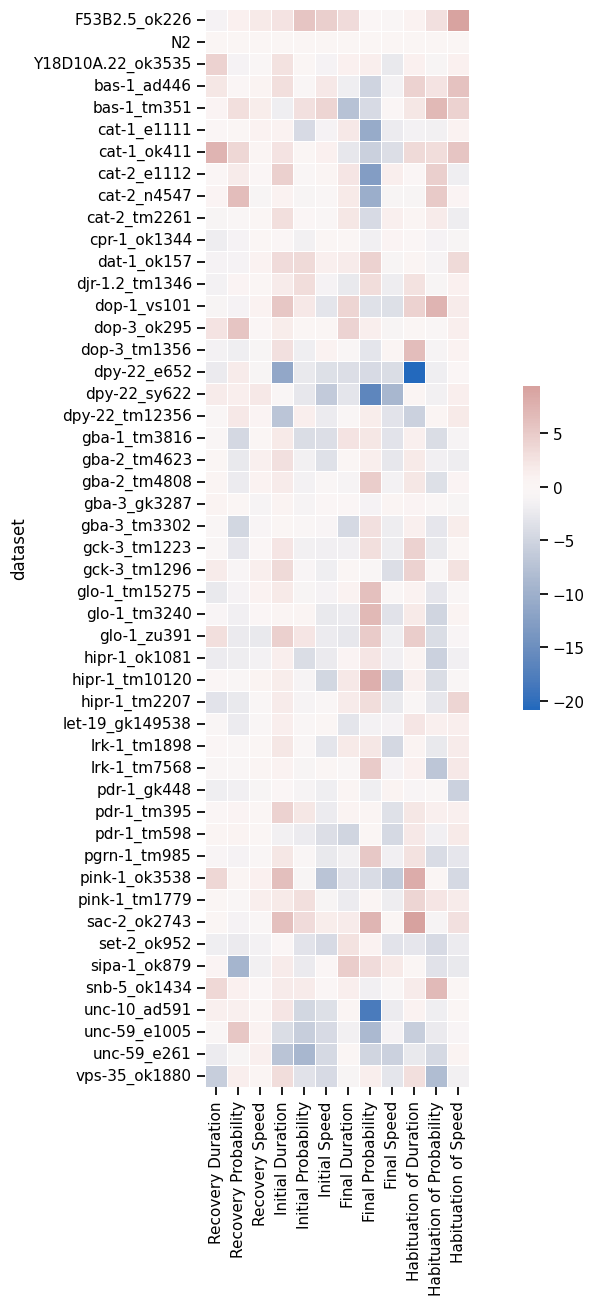

In [234]:
sns.set_context('notebook')
plt.figure(figsize=(14,14))
ax = sns.heatmap(data = PD_habituation_Tstats, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
#                  vmax=400,
#                  vmin=-400, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
# plt.savefig(f'{StrainName}_Speed_{ISI}ISI.png_ByPlate', format='png', dpi=450)
plt.show()

In [235]:
PD_baseline_Tstats_scaled=PD_baseline_Tstats/30
print(PD_baseline_Tstats_scaled)

                   Instantaneous Speed  Interval Speed       Bias     Width  \
dataset                                                                       
F53B2.5_ok226                12.260654        6.846167  12.282225 -0.981909   
glo-1_tm15275                -4.110904       -2.921249  -3.390051 -5.199616   
hipr-1_tm2207                -1.231079       -0.928767   0.029768 -5.672221   
dop-3_tm1356                  3.792449        5.260324   3.298269 -3.598883   
dop-1_vs101                   3.712026       -0.205283   5.659162 -0.480208   
gck-3_tm1223                 -3.969874       -3.909853  -3.264297 -6.841767   
hipr-1_ok1081                -0.714776        0.145493  -1.608110 -5.211540   
sipa-1_ok879                  0.680258        1.056622  -0.262977  0.037290   
gba-3_gk3287                  0.654974        0.334205   0.387526 -1.211314   
cat-1_e1111                   2.580823        2.826791   2.694005  0.962107   
pink-1_ok3538               -10.399611       -9.8443

In [324]:
PD_combined_Tstats = pd.merge(PD_baseline_Tstats, PD_habituation_Tstats, on =['dataset'], how ='left')
PD_combined_Tstats=PD_combined_Tstats.sort_index()
PD_combined_Tstats=PD_combined_Tstats.drop(index="N2")
PD_combined_Tstats=PD_combined_Tstats.dropna()
PD_combined_Tstats_normalize=(PD_combined_Tstats-PD_combined_Tstats.mean())/PD_combined_Tstats.std()
print(PD_combined_Tstats_normalize)
# PD_combined_Tstats.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/CombinedTSTATData.csv')


                   Instantaneous Speed  Interval Speed      Bias     Width  \
dataset                                                                      
F53B2.5_ok226                 2.430858        1.547153  2.608231  0.370164   
Y18D10A.22_ok3535             0.294537        0.278273  0.668020 -0.450471   
bas-1_ad446                   1.416043        1.941370  1.265232  0.255043   
bas-1_tm351                   2.490289        2.198241  3.051559  0.082974   
cat-1_e1111                   0.551297        0.671537  0.420198  0.948942   
cat-1_ok411                   1.137659        2.014672  0.961806  0.210626   
cat-2_e1112                   1.339929        1.302580  1.383322  1.708327   
cat-2_n4547                   1.563960        1.897583  1.307190  0.715791   
cat-2_tm2261                  1.112933        1.034294  0.354628  2.116938   
cpr-1_ok1344                  0.260024        0.054818 -0.461018  0.144379   
dat-1_ok157                   0.939953        0.476100  0.560700

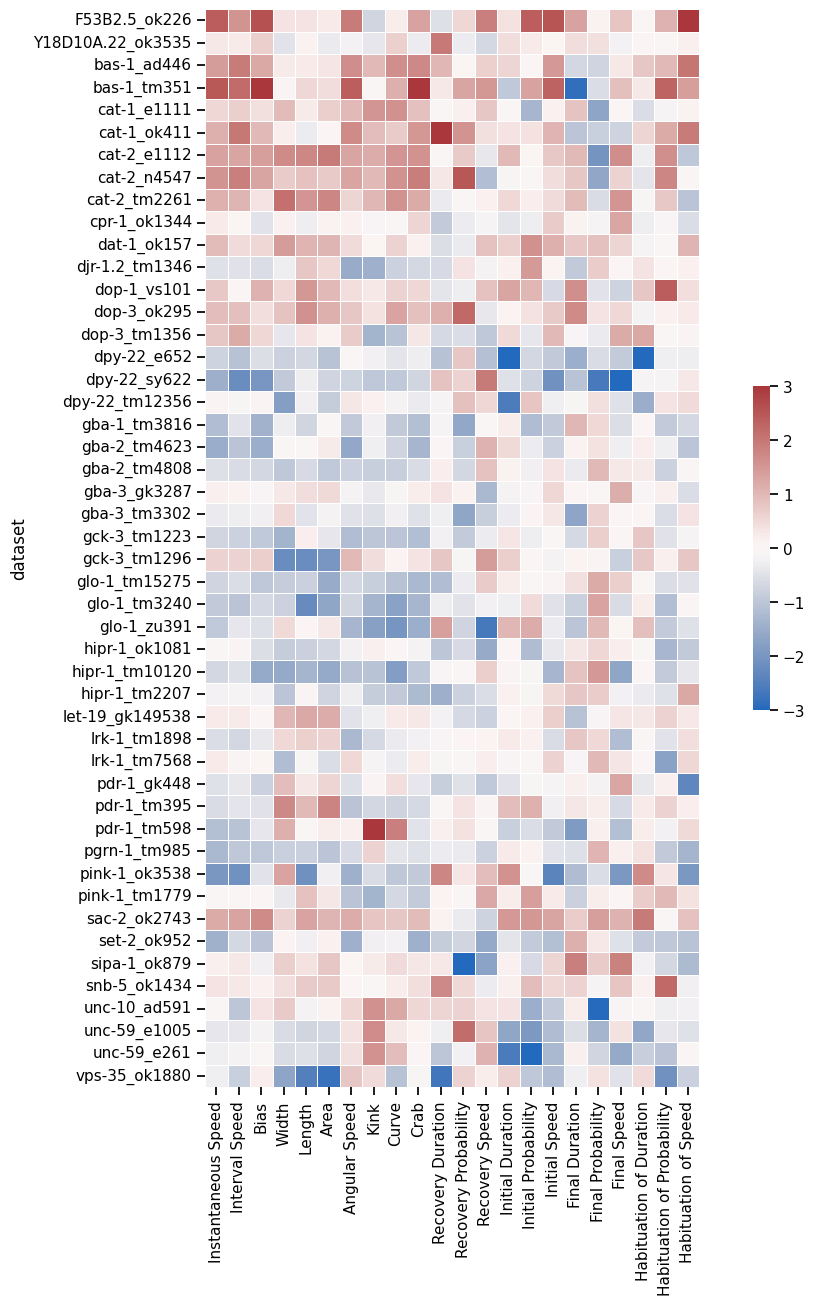

In [329]:
sns.set_context('notebook')
plt.figure(figsize=(14,14))
ax = sns.heatmap(data = PD_combined_Tstats_normalize, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
                 vmax=3,
                 vmin=-3, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
plt.savefig('/Users/Joseph/Desktop/PD_Screen_TapHab/Tstat_Strain_normalized.png', format='png', dpi=450, bbox_inches = "tight")
plt.show()

In [167]:
PD_recov_taps=PD_recov_taps.rename(columns={"dura": "recov_dura", "prob": "recov_prob", "speed":"recov_speed"})
PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate','Gene','Allele'], how ='left')
print(PD_habituation)

In [169]:
PD_habituation = pd.merge(PD_habit_levels, PD_recov_taps, on =['dataset','plate','Gene','Allele'], how ='left')
print(PD_habituation)

     init_dura  init_prob  init_speed  plate        dataset     Gene  Allele  \
0         2.64   0.945946    0.279924      1  F53B2.5_ok226  F53B2.5   ok226   
1         2.84   0.921569    0.324296      2  F53B2.5_ok226  F53B2.5   ok226   
2         3.64   0.947368    0.342308      3  F53B2.5_ok226  F53B2.5   ok226   
3         3.32   0.925000    0.348795      4  F53B2.5_ok226  F53B2.5   ok226   
4         3.02   0.883721    0.332119      5  F53B2.5_ok226  F53B2.5   ok226   
..         ...        ...         ...    ...            ...      ...     ...   
333       3.94   0.787879    0.171574      2  vps-35_ok1880   vps-35  ok1880   
334       3.06   0.615385    0.178758      3  vps-35_ok1880   vps-35  ok1880   
335       4.55   0.214286    0.149670      4  vps-35_ok1880   vps-35  ok1880   
336       2.99   0.500000    0.152174      5  vps-35_ok1880   vps-35  ok1880   
337       2.90   0.583333    0.207586      6  vps-35_ok1880   vps-35  ok1880   

     final_dura  final_prob  final_spee

# T stat analysis by gene

In [261]:
PD_gene_baseline_instantspeed_T=pd.DataFrame(columns = ["dataset","Instantaneous Speed"])
PD_gene_baseline_intspeed_T=pd.DataFrame(columns = ["dataset","Interval Speed"])
PD_gene_baseline_bias_T=pd.DataFrame(columns = ["dataset","Bias"])
PD_gene_baseline_width_T=pd.DataFrame(columns = ["dataset","Width"])
PD_gene_baseline_length_T=pd.DataFrame(columns = ["dataset","Length"])
PD_gene_baseline_area_T=pd.DataFrame(columns = ["dataset","Area"])
PD_gene_baseline_angularspeed_T=pd.DataFrame(columns = ["dataset","Angular Speed"])
PD_gene_baseline_aspectratio_T=pd.DataFrame(columns = ["dataset","Aspect Ratio"])
PD_gene_baseline_kink_T=pd.DataFrame(columns = ["dataset","Kink"])
PD_gene_baseline_curve_T=pd.DataFrame(columns = ["dataset","Curve"])
PD_gene_baseline_crab_T=pd.DataFrame(columns = ["dataset","Crab"])

PD_gene_recovery_dura=pd.DataFrame(columns = ["dataset","Recovery Duration"])
PD_gene_recovery_prob=pd.DataFrame(columns = ["dataset","Recovery Probability"])
PD_gene_recovery_speed=pd.DataFrame(columns = ["dataset","Recovery Speed"])
PD_gene_init_dura=pd.DataFrame(columns = ["dataset","Initial Duration"])
PD_gene_init_prob=pd.DataFrame(columns = ["dataset","Initial Probability"])
PD_gene_init_speed=pd.DataFrame(columns = ["dataset","Initial Speed"])
PD_gene_final_dura=pd.DataFrame(columns = ["dataset","Final Duration"])
PD_gene_final_prob=pd.DataFrame(columns = ["dataset","Final Probability"])
PD_gene_final_speed=pd.DataFrame(columns = ["dataset","Final Speed"])
PD_gene_hab_dura=pd.DataFrame(columns = ["dataset","Habituation of Duration"])
PD_gene_hab_prob=pd.DataFrame(columns = ["dataset","Habituation of Probability"])
PD_gene_hab_speed=pd.DataFrame(columns = ["dataset","Habituation of Speed"])


In [246]:
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')
PD_baseline_last100=PD_baseline_last100.dropna()
print(PD_baseline_last100)

          index     Time   n  Number  Instantaneous Speed  Interval Speed  \
0          6452  490.037  68      45               0.1218          0.0904   
1          6453  490.087  69      45               0.1394          0.1048   
2          6454  490.173  69      45               0.1077          0.0830   
3          6455  490.250  69      45               0.1171          0.0866   
4          6456  490.329  68      45               0.1234          0.0901   
...         ...      ...  ..     ...                  ...             ...   
598967  7224103  589.629  75      49               0.0359          0.0382   
598968  7224104  589.710  75      49               0.0328          0.0441   
598969  7224105  589.789  76      49               0.0310          0.0378   
598970  7224106  589.930  76      49               0.0394          0.0461   
598971  7224107  589.990  76      49               0.0398          0.0543   

         Bias   Width  Length      Area  Angular Speed  Aspect Ratio  Kink 

In [256]:
# print(PD_baseline_last100.Gene.unique())
type(PD_baseline_last100.Gene.unique()[1])

str

In [250]:
ttest=ttest_ind(PD_baseline_last100[PD_baseline_last100.Gene=='F53B2.5']['Instantaneous Speed'],
         PD_baseline_last100[PD_baseline_last100.Gene=='N2']['Instantaneous Speed'],
         equal_var=False)
ttest[0]

367.8196204943649

In [253]:
def TTest_Gene(DatasetList, Type, DF_ref, output):
    for a in DatasetList:
        Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
        row=[a, Tstat]
        output.loc[len(output)]=row
    print(output)

In [260]:
# TTest_Gene(PD_baseline_last100.Gene.unique(), 'Instantaneous Speed', PD_baseline_last100, PD_gene_baseline_instantspeed_T)

       dataset  Instantaneous Speed
0      F53B2.5           367.819620
1        glo-1          -188.871794
2       hipr-1           -79.039410
3        dop-3           170.909447
4        dop-1           111.360792
5        gck-3           -36.216909
6       sipa-1            20.407731
7        gba-3           -19.446717
8        cat-1           151.676953
9       pink-1          -124.019342
10     djr-1.2           -85.295024
11       cat-2           288.138309
12       bas-1           300.802704
13       gba-2          -150.133281
14       pdr-1          -167.490261
15       gba-1          -192.355450
16       set-2          -227.441895
17      unc-10           -15.220599
18       snb-5            49.492619
19          N2             0.000000
20       src-1           -96.139459
21      let-19            35.459945
22       lrk-1            -5.711729
23       dat-1           137.472635
24       sac-2           179.693277
25      dpy-22          -161.068017
26      unc-59           -78

In [258]:
# PD_gene_baseline_instantspeed_T.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/baselineinstantspeedgene.csv')
# PD_baseline_last100.to_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv')

In [262]:
TTest_Gene(PD_baseline_last100.Gene.unique(), 'Instantaneous Speed', PD_baseline_last100, PD_gene_baseline_instantspeed_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Interval Speed", PD_baseline_last100, PD_gene_baseline_intspeed_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Bias", PD_baseline_last100, PD_gene_baseline_bias_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Width", PD_baseline_last100, PD_gene_baseline_width_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Length", PD_baseline_last100, PD_gene_baseline_length_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Area", PD_baseline_last100, PD_gene_baseline_area_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Angular Speed", PD_baseline_last100, PD_gene_baseline_angularspeed_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Aspect Ratio", PD_baseline_last100, PD_gene_baseline_aspectratio_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Kink", PD_baseline_last100, PD_gene_baseline_kink_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Curve", PD_baseline_last100, PD_gene_baseline_curve_T)
TTest_Gene(PD_baseline_last100.Gene.unique(), "Crab", PD_baseline_last100, PD_gene_baseline_crab_T)

TTest_Gene(PD_habituation["Gene"].unique(), "recovery_dura", PD_habituation, PD_gene_recovery_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "recovery_prob", PD_habituation, PD_gene_recovery_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "recovery_speed", PD_habituation, PD_gene_recovery_speed)
TTest_Gene(PD_habituation["Gene"].unique(), "init_dura", PD_habituation, PD_gene_init_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "init_prob", PD_habituation, PD_gene_init_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "init_speed", PD_habituation, PD_gene_init_speed)
TTest_Gene(PD_habituation["Gene"].unique(), "final_dura", PD_habituation, PD_gene_final_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "final_prob", PD_habituation, PD_gene_final_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "final_speed", PD_habituation, PD_gene_final_speed)
TTest_Gene(PD_habituation["Gene"].unique(), "habit_dura", PD_habituation, PD_gene_hab_dura)
TTest_Gene(PD_habituation["Gene"].unique(), "habit_prob", PD_habituation, PD_gene_hab_prob)
TTest_Gene(PD_habituation["Gene"].unique(), "habit_speed", PD_habituation, PD_gene_hab_speed)

       dataset  Instantaneous Speed
0      F53B2.5           367.819620
1        glo-1          -188.871794
2       hipr-1           -79.039410
3        dop-3           170.909447
4        dop-1           111.360792
5        gck-3           -36.216909
6       sipa-1            20.407731
7        gba-3           -19.446717
8        cat-1           151.676953
9       pink-1          -124.019342
10     djr-1.2           -85.295024
11       cat-2           288.138309
12       bas-1           300.802704
13       gba-2          -150.133281
14       pdr-1          -167.490261
15       gba-1          -192.355450
16       set-2          -227.441895
17      unc-10           -15.220599
18       snb-5            49.492619
19          N2             0.000000
20       src-1           -96.139459
21      let-19            35.459945
22       lrk-1            -5.711729
23       dat-1           137.472635
24       sac-2           179.693277
25      dpy-22          -161.068017
26      unc-59           -78

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. 

       dataset  Recovery Speed
0      F53B2.5        1.923281
1           N2        0.000000
2   Y18D10A.22       -0.548731
3        bas-1        1.364357
4        cat-1        0.745823
5        cat-2       -0.293630
6        cpr-1       -0.051053
7        dat-1        0.933435
8      djr-1.2       -0.061637
9        dop-1        0.922452
10       dop-3       -0.609236
11      dpy-22        0.163568
12       gba-1        0.066729
13       gba-2        1.146691
14       gba-3       -1.130632
15       gck-3        0.391595
16       glo-1       -0.466548
17      hipr-1       -0.478794
18      let-19       -0.659915
19       lrk-1        0.281441
20       pdr-1       -0.135956
21      pgrn-1       -0.659442
22      pink-1        1.214281
23       sac-2       -0.631439
24       set-2       -1.421148
25      sipa-1       -1.561919
26       snb-5       -0.208809
27       src-1             NaN
28      unc-10        0.457360
29      unc-59        1.205032
30      vps-35        0.320890
       d

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. 

       dataset  Initial Speed
0      F53B2.5       4.539886
1           N2       0.000000
2   Y18D10A.22      -1.364776
3        bas-1       3.083043
4        cat-1      -0.391616
5        cat-2      -0.111459
6        cpr-1       0.183228
7        dat-1       1.216262
8      djr-1.2      -1.245702
9        dop-1      -3.023414
10       dop-3       0.679647
11      dpy-22      -3.918447
12       gba-1      -3.743467
13       gba-2      -1.840632
14       gba-3      -0.509468
15       gck-3      -1.884209
16       glo-1      -2.421405
17      hipr-1      -2.453793
18      let-19       0.089303
19       lrk-1      -1.326393
20       pdr-1      -2.855949
21      pgrn-1      -2.583266
22      pink-1      -2.861516
23       sac-2       1.569782
24       set-2      -4.233839
25      sipa-1      -0.159362
26       snb-5      -0.202882
27       src-1            NaN
28      unc-10      -3.643205
29      unc-59      -5.110691
30      vps-35      -4.340225
       dataset  Final Duration
0      F5

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. 

       dataset  Final Speed
0      F53B2.5    -0.381321
1           N2     0.000000
2   Y18D10A.22    -2.519655
3        bas-1    -0.693294
4        cat-1    -3.170919
5        cat-2     0.700574
6        cpr-1     0.632960
7        dat-1    -0.882770
8      djr-1.2    -2.043618
9        dop-1    -3.730571
10       dop-3    -0.428109
11      dpy-22    -5.265840
12       gba-1    -3.259721
13       gba-2    -2.184645
14       gba-3    -0.437224
15       gck-3    -2.834454
16       glo-1    -2.595226
17      hipr-1    -3.004900
18      let-19    -1.351176
19       lrk-1    -2.701137
20       pdr-1    -2.427924
21      pgrn-1    -1.698544
22      pink-1    -3.695894
23       sac-2     0.214459
24       set-2    -3.186813
25      sipa-1     1.848954
26       snb-5    -0.390370
27       src-1          NaN
28      unc-10    -2.298279
29      unc-59    -2.909959
30      vps-35    -3.096933
       dataset  Habituation of Duration
0      F53B2.5                 0.779025
1           N2          

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Tstat=ttest_ind(DF_ref[DF_ref.Gene == a][Type], DF_ref[DF_ref.Gene == "N2"][Type],equal_var=False)[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_40328/135514856.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. 

In [269]:
PD_gene_baseline_Tstats=PD_gene_baseline_instantspeed_T
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_intspeed_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_bias_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_width_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_length_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_area_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_angularspeed_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_kink_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_curve_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.join(PD_gene_baseline_crab_T.iloc[:,1])
PD_gene_baseline_Tstats=PD_gene_baseline_Tstats.set_index("dataset")
print(PD_gene_baseline_Tstats)
PD_gene_habituation_Tstats=PD_gene_recovery_dura
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_recovery_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_dura.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_init_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_dura.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_final_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_dura.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_prob.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.join(PD_gene_hab_speed.iloc[:,1])
PD_gene_habituation_Tstats=PD_gene_habituation_Tstats.set_index("dataset").dropna()                                        
print(PD_gene_habituation_Tstats)

            Instantaneous Speed  Interval Speed        Bias       Width  \
dataset                                                                   
F53B2.5              367.819620      205.385004  368.466741  -29.457267   
glo-1               -188.871794     -158.095910  -91.007139 -151.615397   
hipr-1               -79.039410      -36.591710  -84.476822 -276.518474   
dop-3                170.909447      179.619001  124.053236  -26.712441   
dop-1                111.360792       -6.158491  169.774852  -14.406243   
gck-3                -36.216909      -42.140863   -1.777017 -251.981995   
sipa-1                20.407731       31.698671   -7.889296    1.118701   
gba-3                -19.446717      -24.222366    0.957504  -34.183334   
cat-1                151.676953      180.577306  150.520186   -1.374733   
pink-1              -124.019342     -116.798955   -2.032256    1.257802   
djr-1.2              -85.295024      -75.395277  -50.952329  -96.113645   
cat-2                288.

In [274]:
PD_gene_baseline_Tstats_scaled=PD_gene_baseline_Tstats/40
print(PD_gene_baseline_Tstats_scaled)

            Instantaneous Speed  Interval Speed      Bias     Width  \
dataset                                                               
F53B2.5                9.195491        5.134625  9.211669 -0.736432   
glo-1                 -4.721795       -3.952398 -2.275178 -3.790385   
hipr-1                -1.975985       -0.914793 -2.111921 -6.912962   
dop-3                  4.272736        4.490475  3.101331 -0.667811   
dop-1                  2.784020       -0.153962  4.244371 -0.360156   
gck-3                 -0.905423       -1.053522 -0.044425 -6.299550   
sipa-1                 0.510193        0.792467 -0.197232  0.027968   
gba-3                 -0.486168       -0.605559  0.023938 -0.854583   
cat-1                  3.791924        4.514433  3.763005 -0.034368   
pink-1                -3.100484       -2.919974 -0.050806  0.031445   
djr-1.2               -2.132376       -1.884882 -1.273808 -2.402841   
cat-2                  7.203458        6.535424  5.480244  3.076730   
bas-1 

In [317]:
PD_gene_Tstats_combined = pd.merge(PD_gene_baseline_Tstats, PD_gene_habituation_Tstats, on =['dataset'], how ='left')
PD_gene_Tstats_combined=PD_gene_Tstats_combined.dropna().sort_index().drop(index="N2")
PD_gene_Tstats_combined_normalize=(PD_gene_Tstats_combined-PD_gene_Tstats_combined.mean())/PD_gene_Tstats_combined.std()
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.set_index("dataset")
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.sort_index()
# PD_gene_Tstats_combined=PD_gene_Tstats_combined.drop(index="N2")

print(PD_gene_Tstats_combined_normalize)

            Instantaneous Speed  Interval Speed      Bias     Width    Length  \
dataset                                                                         
F53B2.5                2.282706        1.473741  2.448388  0.388179  0.323723   
Y18D10A.22             0.215756        0.230342  0.548709 -0.427151  0.075303   
bas-1                  1.863029        2.670976  2.191758  0.019748  0.331793   
cat-1                  0.929165        1.297214  0.825174  0.665071 -0.319538   
cat-2                  1.783721        1.872453  1.336757  1.892081  1.561694   
cpr-1                  0.182363        0.011374 -0.556742  0.163853 -0.394974   
dat-1                  0.840214        0.424196  0.443631  1.437359  1.092338   
djr-1.2               -0.554815       -0.524235 -0.675346 -0.269049  0.787873   
dop-1                  0.676695       -0.031560  0.968578  0.536581  1.585351   
dop-3                  1.049604        1.290395  0.628054  0.415243  0.866536   
dpy-22                -1.029

In [345]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/PD_Screen_TapHab/Gene_Orthology.csv')
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"dataset"})
print(Gene_Orthology)

    Unnamed: 0             Orthology   dataset    Human Gene
0            0           KCNS3•kvs-5     kvs-5         KCNS3
1            1           LAMB2•lam-1     lam-1         LAMB2
2            2             GBA•gba-4     gba-4           GBA
3            3        ATP13A3•catp-6    catp-6       ATP13A3
4            4          MCCC1•mccc-1    mccc-1         MCCC1
..         ...                   ...       ...           ...
87          87          VPS35•vps-35    vps-35         VPS35
88          88  FAM49B/CYRIB•R07G3.8   R07G3.8  FAM49B/CYRIB
89          89          MED13•let-19    let-19         MED13
90          90           CLCN3•clh-5     clh-5         CLCN3
91          91       CAB39L•mop-25.2  mop-25.2        CAB39L

[92 rows x 4 columns]


In [346]:
PD_gene_Tstats_combined_normalize_joined=pd.merge(PD_gene_Tstats_combined_normalize,
                                                 Gene_Orthology,
                                                 on='dataset',
                                                 how='inner')

print(PD_gene_Tstats_combined_normalize_joined)

       dataset  Instantaneous Speed  Interval Speed      Bias     Width  \
0      F53B2.5             2.282706        1.473741  2.448388  0.388179   
1   Y18D10A.22             0.215756        0.230342  0.548709 -0.427151   
2        bas-1             1.863029        2.670976  2.191758  0.019748   
3        cat-1             0.929165        1.297214  0.825174  0.665071   
4        cat-2             1.783721        1.872453  1.336757  1.892081   
5        cpr-1             0.182363        0.011374 -0.556742  0.163853   
6        dat-1             0.840214        0.424196  0.443631  1.437359   
7      djr-1.2            -0.554815       -0.524235 -0.675346 -0.269049   
8        dop-3             1.049604        1.290395  0.628054  0.415243   
9       dpy-22            -1.029325       -1.397536 -0.870323 -1.438574   
10       gba-1            -1.225255       -0.484688 -1.469515 -0.260295   
11       gba-2            -0.960849       -0.961149 -1.160538 -0.732648   
12       gba-3           

In [358]:
PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_joined.set_index("Orthology").sort_index()
PD_gene_Tstats_combined_normalize_heatmap=PD_gene_Tstats_combined_normalize_heatmap.drop(columns=['dataset','Unnamed: 0','Human Gene'])
print(PD_gene_Tstats_combined_normalize_heatmap)

                  Instantaneous Speed  Interval Speed      Bias     Width  \
Orthology                                                                   
CTSB•cpr-1                   0.182363        0.011374 -0.556742  0.163853   
DDC•bas-1                    1.863029        2.670976  2.191758  0.019748   
DRD2/3/4•dop-3               1.049604        1.290395  0.628054  0.415243   
GBA•gba-1                   -1.225255       -0.484688 -1.469515 -0.260295   
GBA•gba-2                   -0.960849       -0.961149 -1.160538 -0.732648   
GBA•gba-3                   -0.142456       -0.160099 -0.288734  0.341580   
GRN•pgrn-1                  -1.313790       -0.997889 -1.056372 -0.797830   
HIP1R•Y18D10A.22             0.215756        0.230342  0.548709 -0.427151   
HIP1R•hipr-1                -0.515640       -0.248117 -0.925029 -2.047831   
INPP5F•sac-2                 1.104610        1.247056  1.567764  0.641743   
KPNA1•F53B2.5                2.282706        1.473741  2.448388  0.388179   

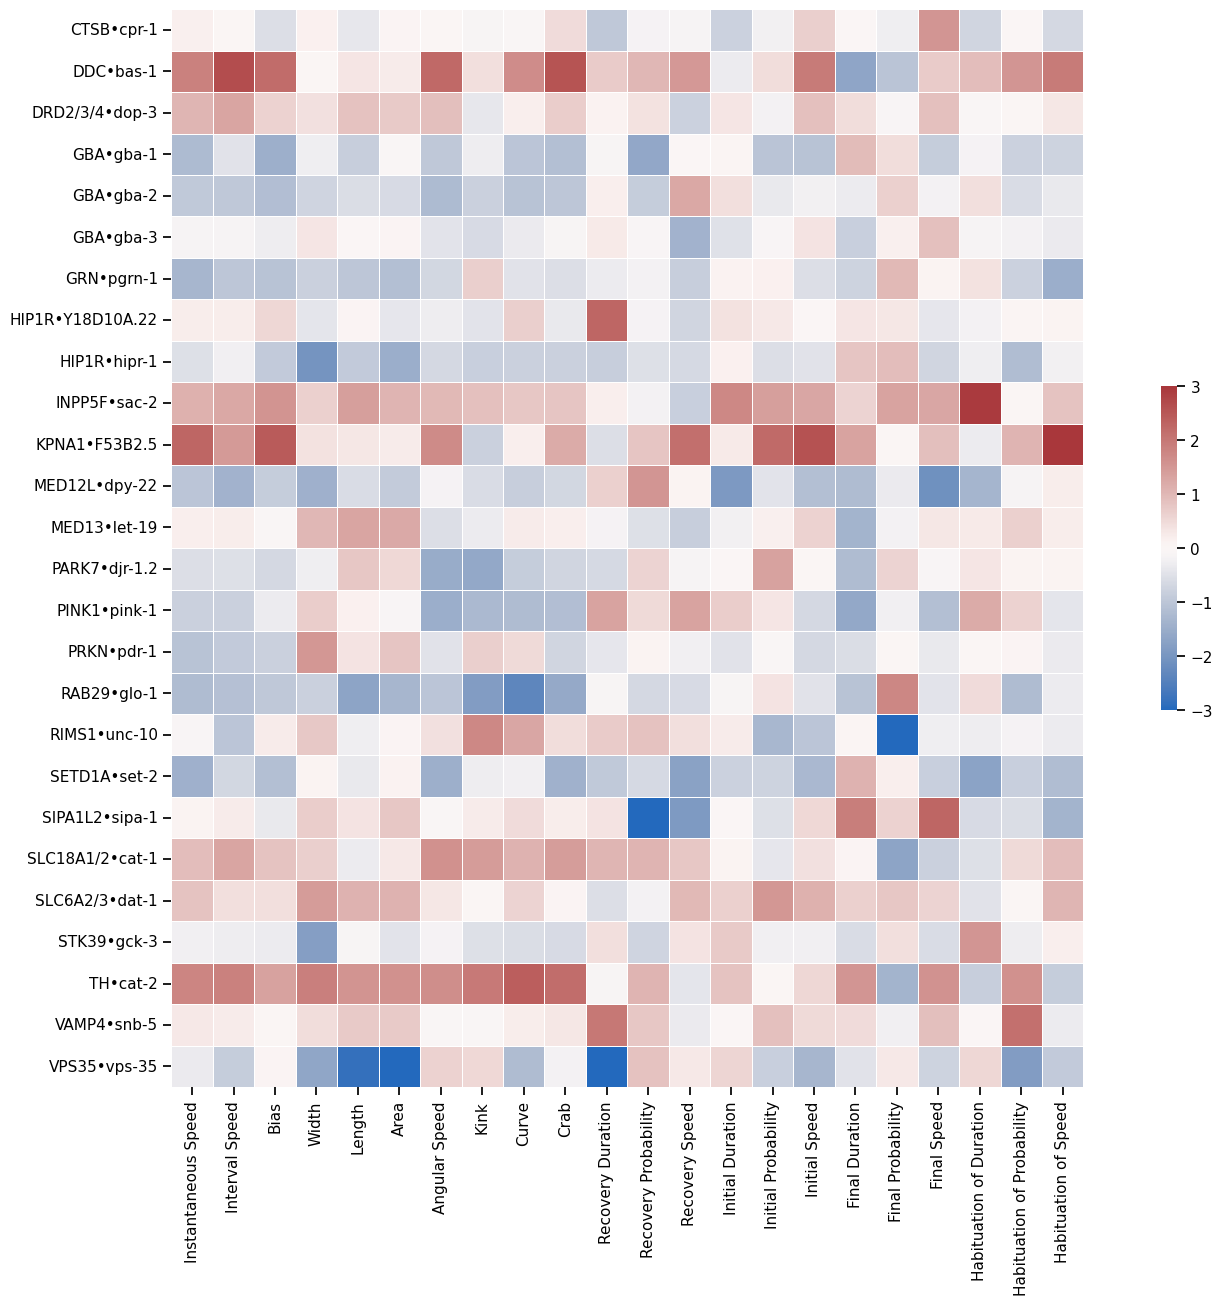

In [354]:
sns.set_context('notebook')
plt.figure(figsize=(20,14))
ax = sns.heatmap(data = PD_gene_Tstats_combined_normalize_heatmap, 
                 annot=False, 
                 linewidth=0.5, 
                 square=True, 
                 cmap="vlag", 
                 center=0, 
                 vmax=3,
                 vmin=-3, 
                 xticklabels=1,
                 yticklabels=1,
                 cbar_kws={"shrink": .3})
ax.set_ylabel('')    
plt.savefig('/Users/Joseph/Desktop/PD_Screen_TapHab/Tstat_GENE_normalized_square.png', format='png', dpi=450, bbox_inches = "tight")
plt.show()

In [333]:
PD_gene_Tstats_melted=PD_gene_Tstats_combined_normalize.reset_index()
print(PD_gene_Tstats_melted)
PD_gene_Tstats_melted_gene=pd.melt(PD_gene_Tstats_melted, id_vars=['dataset'],
                                   var_name='Metric',
                                   value_name='Normalized T_score')
PD_gene_Tstats_melted_gene_sorted=PD_gene_Tstats_melted_gene.sort_values(by=['Normalized T_score'])
print(PD_gene_Tstats_melted_gene)
print(PD_gene_Tstats_melted_gene_sorted)
# PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
#                              value_name='metric')


       dataset  Instantaneous Speed  Interval Speed      Bias     Width  \
0      F53B2.5             2.282706        1.473741  2.448388  0.388179   
1   Y18D10A.22             0.215756        0.230342  0.548709 -0.427151   
2        bas-1             1.863029        2.670976  2.191758  0.019748   
3        cat-1             0.929165        1.297214  0.825174  0.665071   
4        cat-2             1.783721        1.872453  1.336757  1.892081   
5        cpr-1             0.182363        0.011374 -0.556742  0.163853   
6        dat-1             0.840214        0.424196  0.443631  1.437359   
7      djr-1.2            -0.554815       -0.524235 -0.675346 -0.269049   
8        dop-1             0.676695       -0.031560  0.968578  0.536581   
9        dop-3             1.049604        1.290395  0.628054  0.415243   
10      dpy-22            -1.029325       -1.397536 -0.870323 -1.438574   
11       gba-1            -1.225255       -0.484688 -1.469515 -0.260295   
12       gba-2           

In [355]:
metric_palette=["k","k","k","k","k","k","k","k","k","k",
                "darkgray","darkgray","darkgray","darkgray",
                "darkgray","darkgray","darkgray","darkgray",
                "darkgray","darkgray","darkgray","darkgray"]

In [363]:
PD_gene_Tstats_combined_normalize_orthology_melted=PD_gene_Tstats_combined_normalize_heatmap.reset_index()
PD_gene_Tstats_combined_normalize_orthology_melted=pd.melt(PD_gene_Tstats_combined_normalize_orthology_melted, id_vars=['Orthology'],
                                   var_name='Metric',
                                   value_name='Normalized T_score')
PD_gene_Tstats_orthology_melted_gene_sorted=PD_gene_Tstats_combined_normalize_orthology_melted.sort_values(by=['Normalized T_score'])
# print(PD_gene_Tstats_melted_gene)
print(PD_gene_Tstats_orthology_melted_gene_sorted)
# PD_gene_Tstats_melted_metric=pd.melt(PD_gene_Tstats_melted_gene, id_vars=['dataset'],
#                              value_name='metric')



          Orthology                   Metric  Normalized T_score
305  SIPA1L2•sipa-1     Recovery Probability           -3.569980
459    RIMS1•unc-10        Final Probability           -3.147521
155    VPS35•vps-35                     Area           -3.062273
285    VPS35•vps-35        Recovery Duration           -3.011287
129    VPS35•vps-35                   Length           -2.847912
..              ...                      ...                 ...
235       DDC•bas-1                     Crab            2.572696
400   KPNA1•F53B2.5            Initial Speed            2.587041
27        DDC•bas-1           Interval Speed            2.670976
503    INPP5F•sac-2  Habituation of Duration            2.943427
556   KPNA1•F53B2.5     Habituation of Speed            3.378546

[572 rows x 3 columns]


In [361]:
print(PD_gene_Tstats_melted_gene.dataset.unique())
PD_gene_Tstats_combined_normalize_orthology=PD_gene_Tstats_combined_normalize_heatmap.reset_index()
print(PD_gene_Tstats_combined_normalize_orthology.Orthology.unique())

['F53B2.5' 'Y18D10A.22' 'bas-1' 'cat-1' 'cat-2' 'cpr-1' 'dat-1' 'djr-1.2'
 'dop-1' 'dop-3' 'dpy-22' 'gba-1' 'gba-2' 'gba-3' 'gck-3' 'glo-1' 'hipr-1'
 'let-19' 'lrk-1' 'pdr-1' 'pgrn-1' 'pink-1' 'sac-2' 'set-2' 'sipa-1'
 'snb-5' 'unc-10' 'unc-59' 'vps-35']
['CTSB•cpr-1' 'DDC•bas-1' 'DRD2/3/4•dop-3' 'GBA•gba-1' 'GBA•gba-2'
 'GBA•gba-3' 'GRN•pgrn-1' 'HIP1R•Y18D10A.22' 'HIP1R•hipr-1' 'INPP5F•sac-2'
 'KPNA1•F53B2.5' 'MED12L•dpy-22' 'MED13•let-19' 'PARK7•djr-1.2'
 'PINK1•pink-1' 'PRKN•pdr-1' 'RAB29•glo-1' 'RIMS1•unc-10' 'SETD1A•set-2'
 'SIPA1L2•sipa-1' 'SLC18A1/2•cat-1' 'SLC6A2/3•dat-1' 'STK39•gck-3'
 'TH•cat-2' 'VAMP4•snb-5' 'VPS35•vps-35']


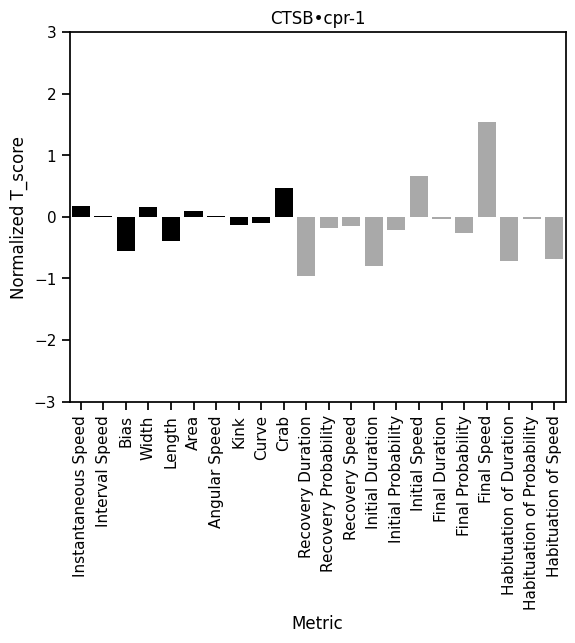

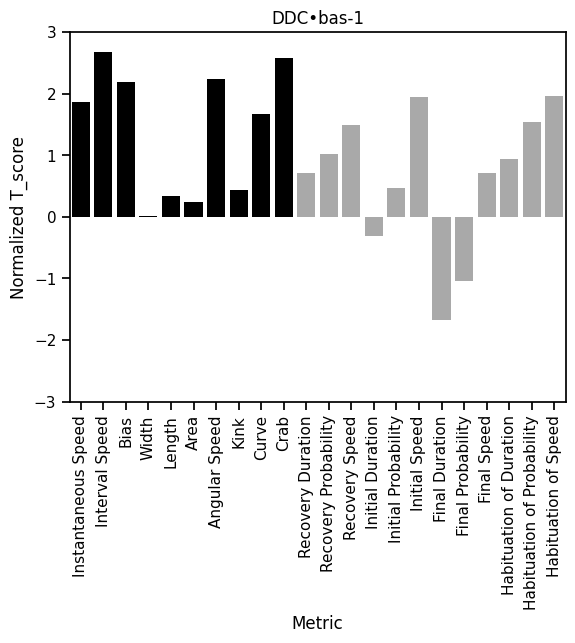

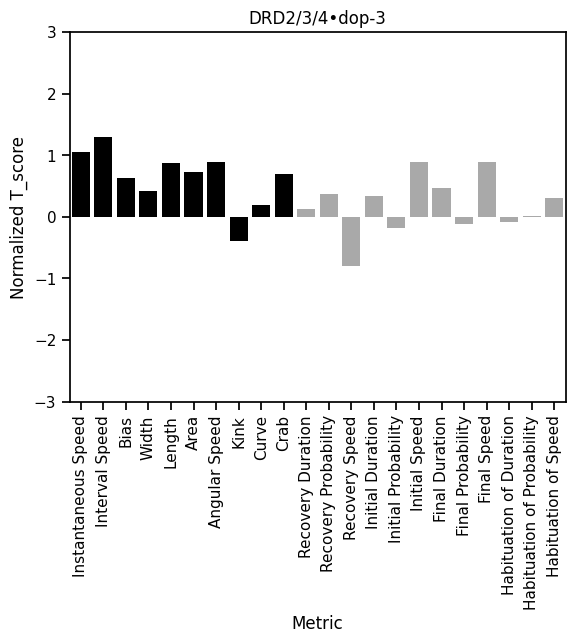

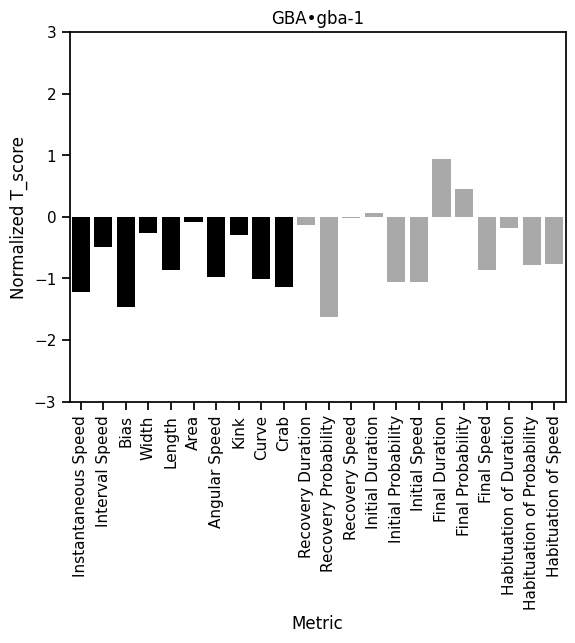

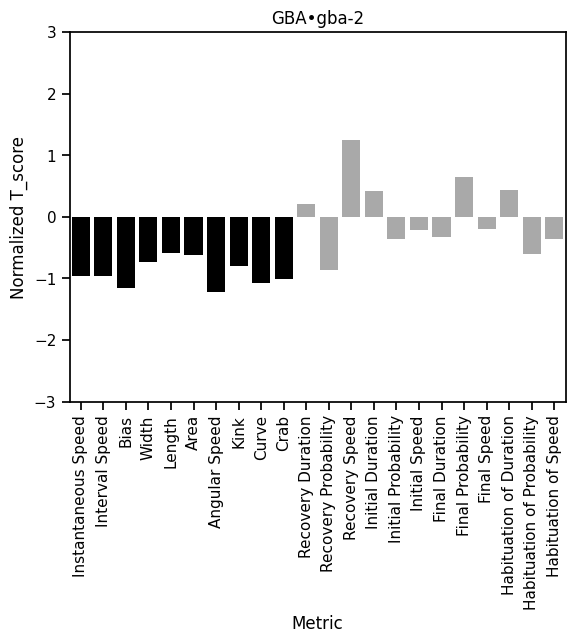

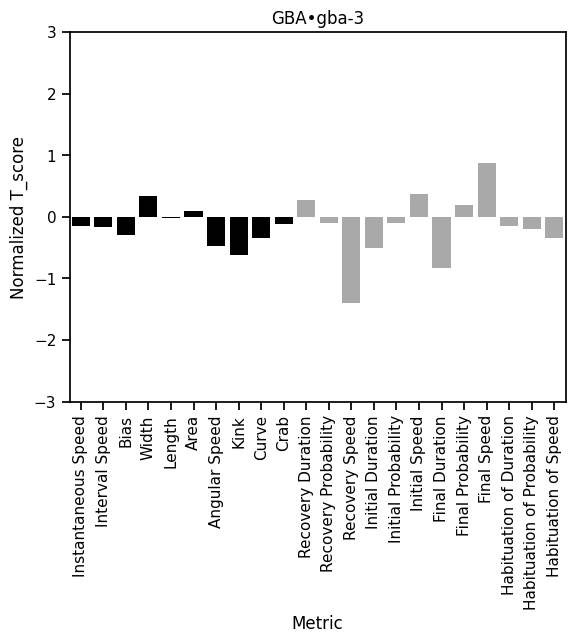

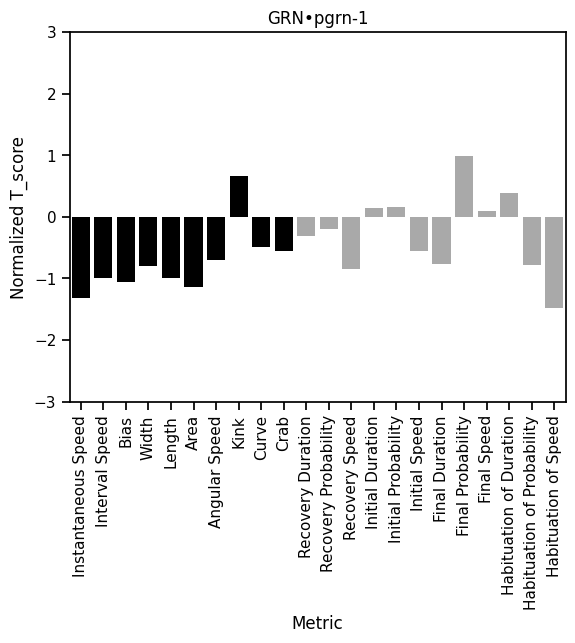

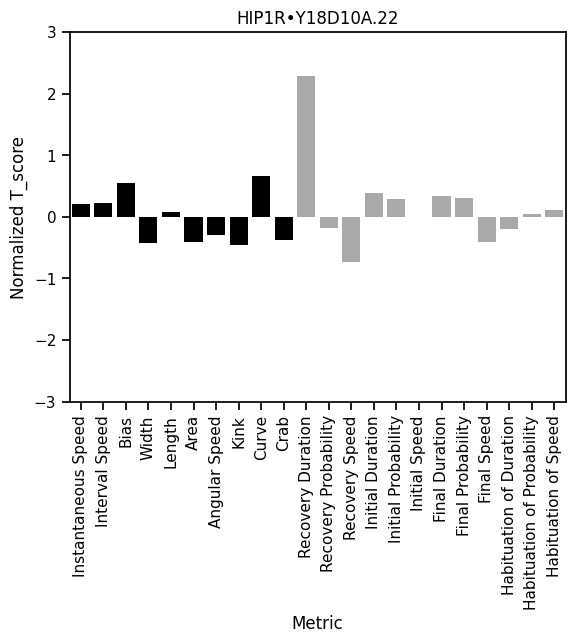

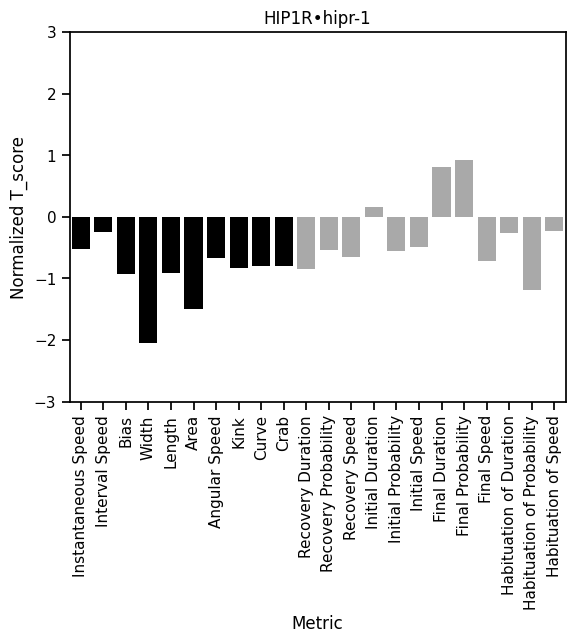

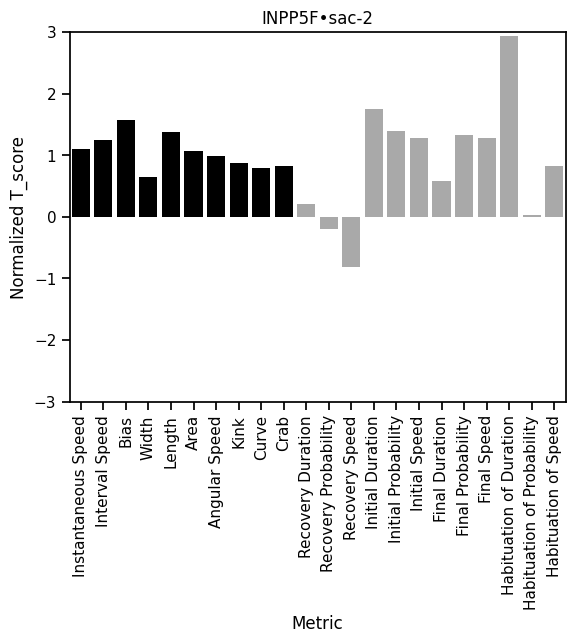

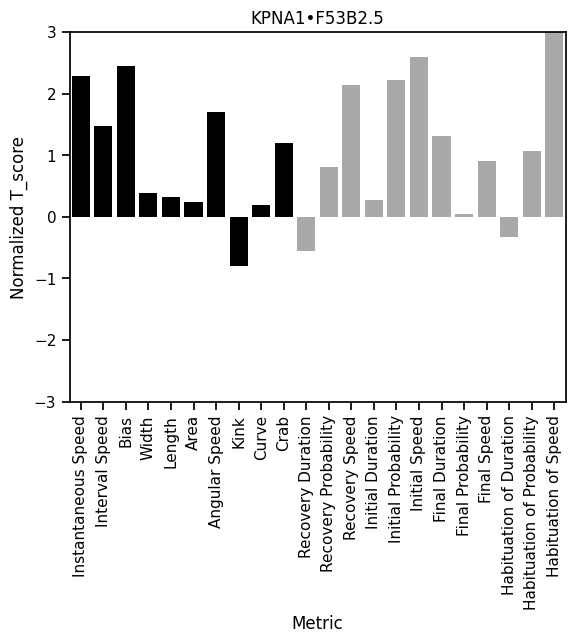

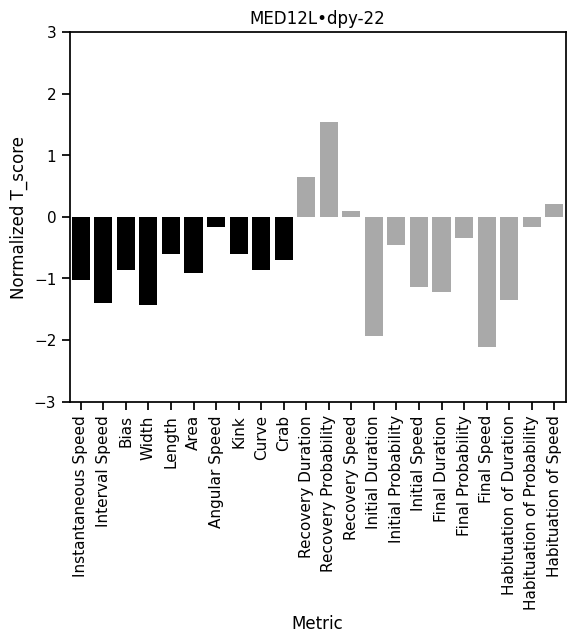

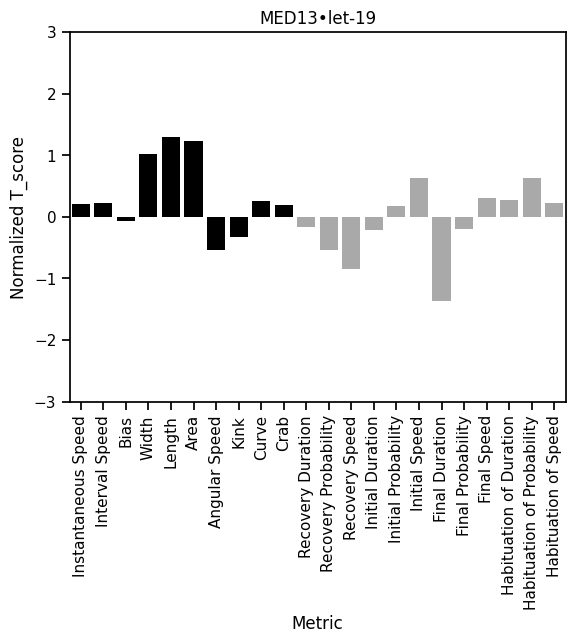

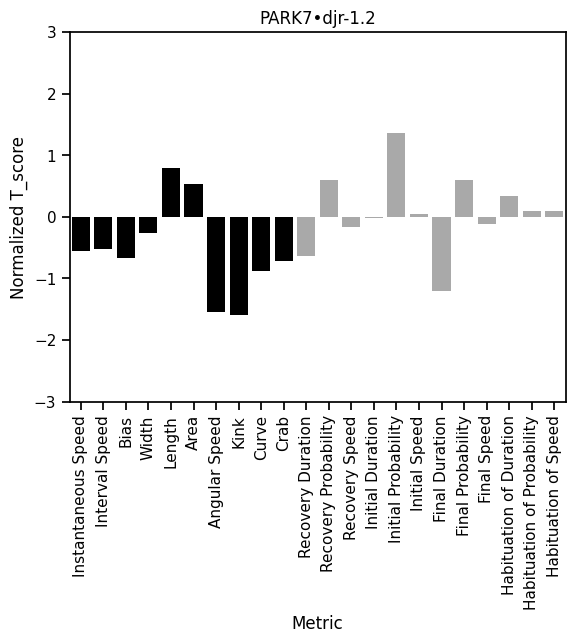

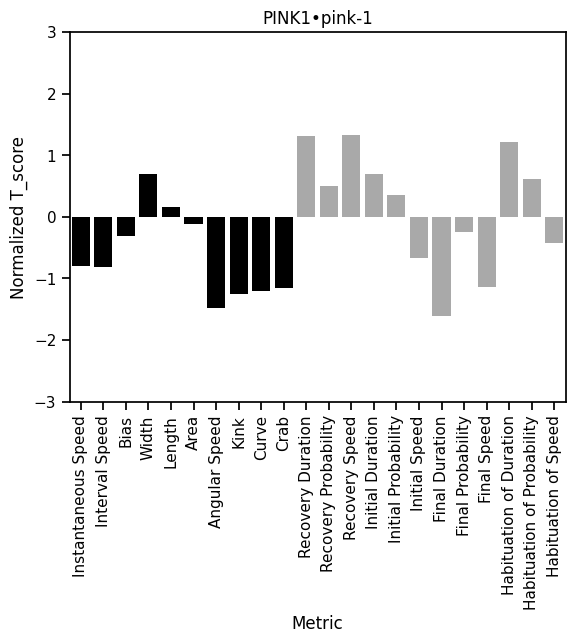

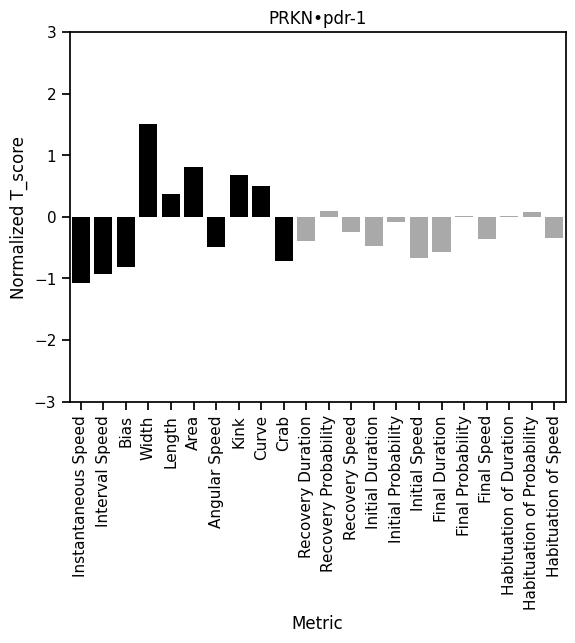

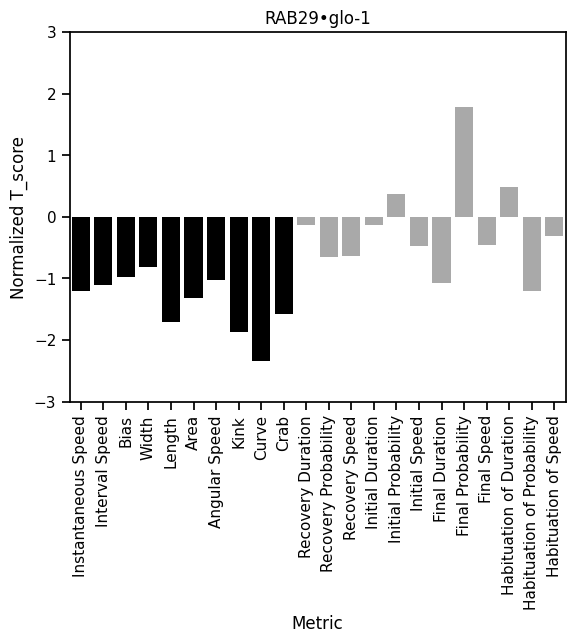

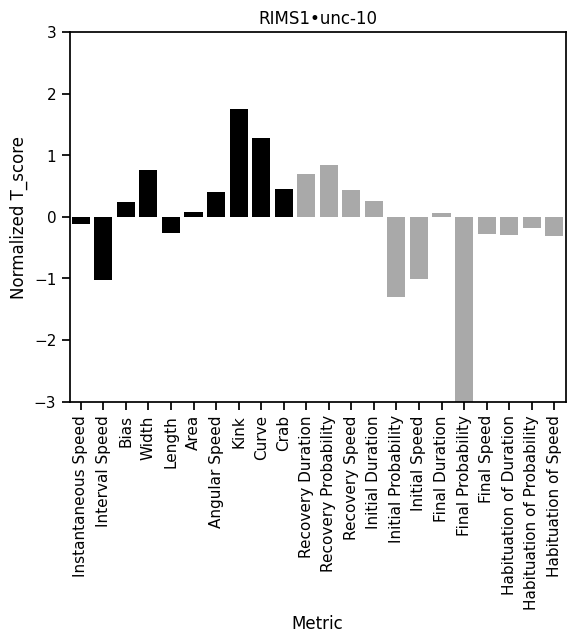

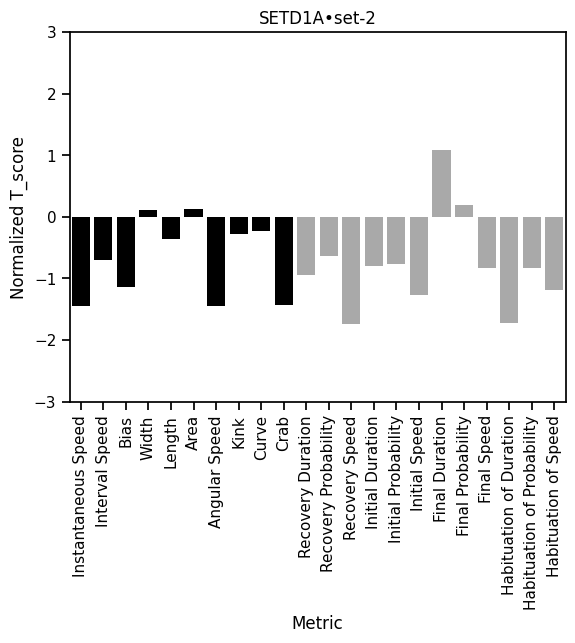

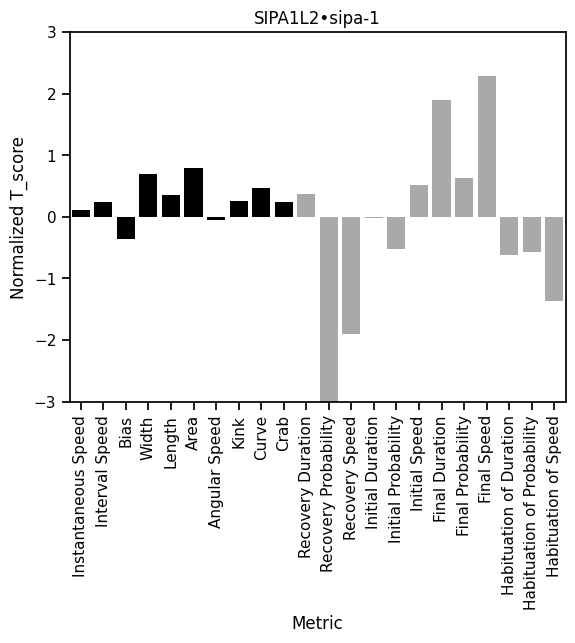

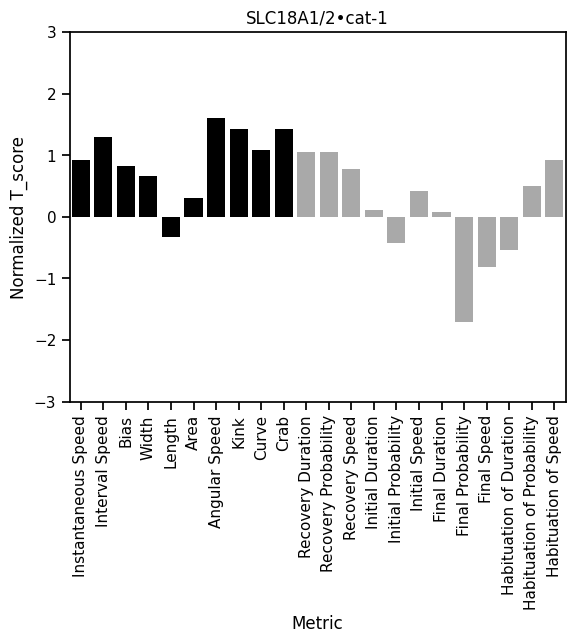

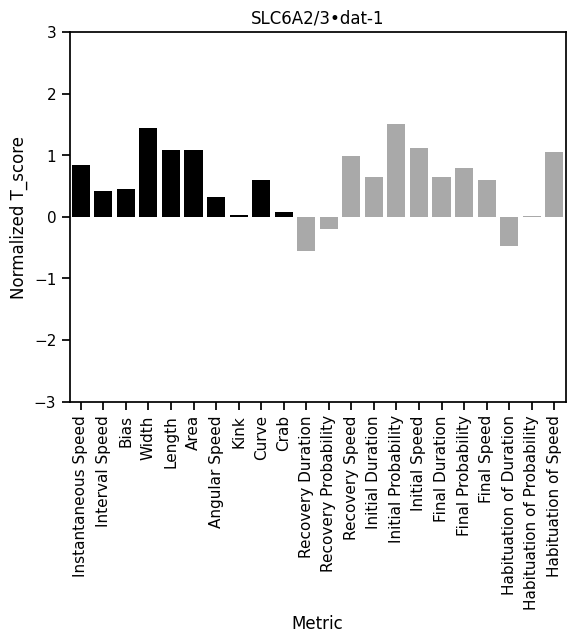

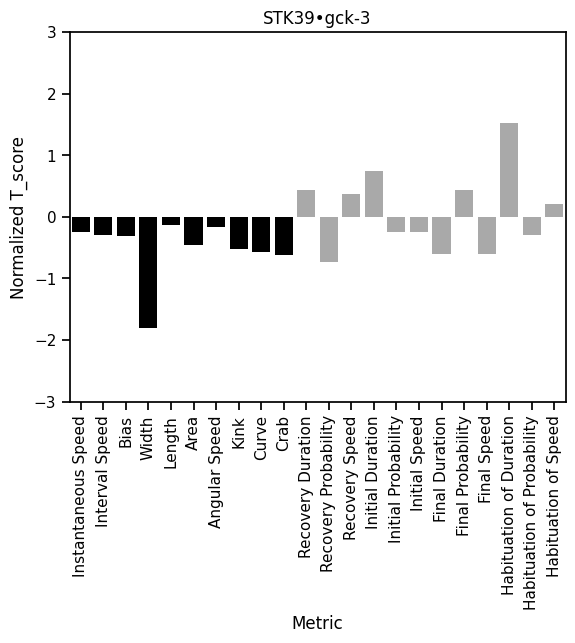

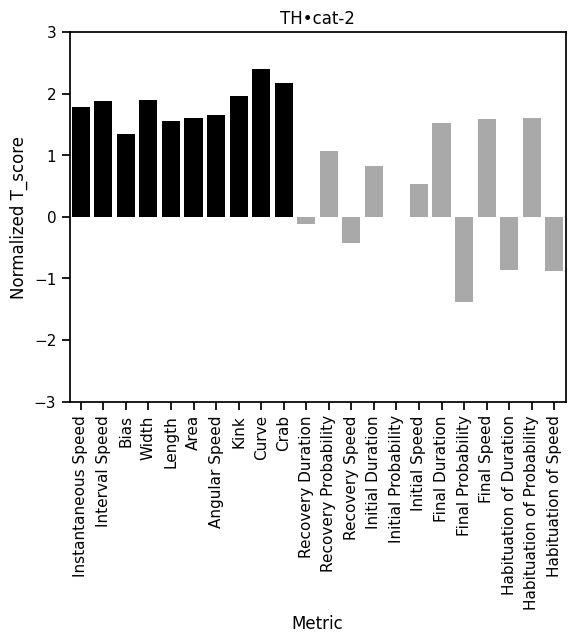

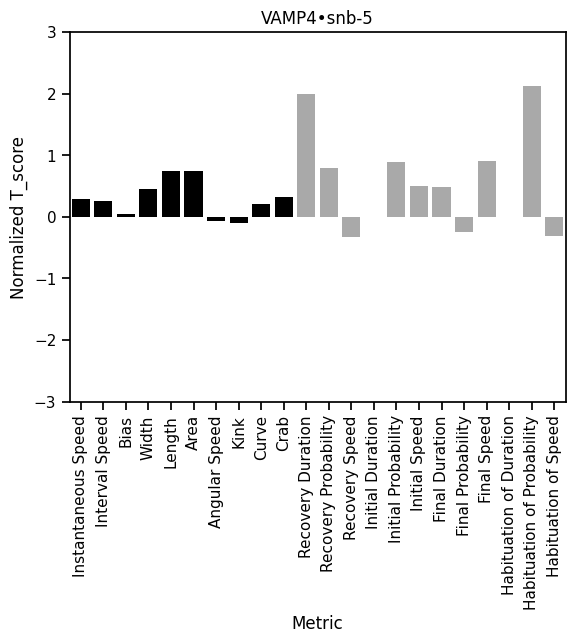

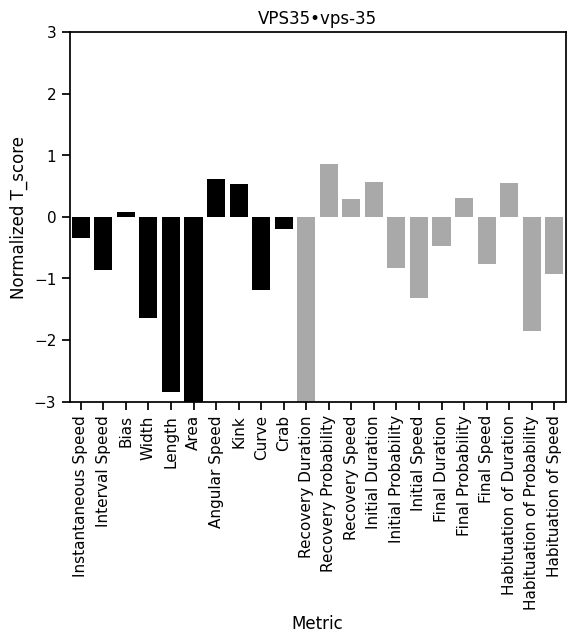

done


In [368]:
# sns.barplot(data=PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], x="Metric", y="T_score")
# plt.xticks(rotation=90)

sns.set_context('notebook')
# # plt.figure(figsize=(14,14))
# ax = sns.barplot(data = PD_gene_Tstats_melted_gene[PD_gene_Tstats_melted_gene.dataset=="F53B2.5"], 
#                 x="Metric",
#                 y="T_score",
#                 palette=metric_palette)
# plt.xticks(rotation=90)
# # plt.savefig('/Users/Joseph/Desktop/PD_Screen_TapHab/Tstat_GENE.png', format='png', dpi=450, bbox_inches = "tight")
# # '/Users/Joseph/Desktop/PD_Screen_TapHab/Baseline100Data.csv'
# plt.show()

for x in PD_gene_Tstats_combined_normalize_orthology_melted.Orthology.unique():
    plt.figure()
    ax = sns.barplot(data = PD_gene_Tstats_combined_normalize_orthology_melted[PD_gene_Tstats_combined_normalize_orthology_melted.Orthology==f"{x}"], 
                x="Metric",
                y="Normalized T_score",
                palette=metric_palette).set_title(f"{x}")
    plt.ylim(-3,3)
    plt.xticks(rotation=90)
    plt.savefig(f'/Users/Joseph/Desktop/PD_Screen_TapHab/Gene_Metrics/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
    plt.show()
print("done")

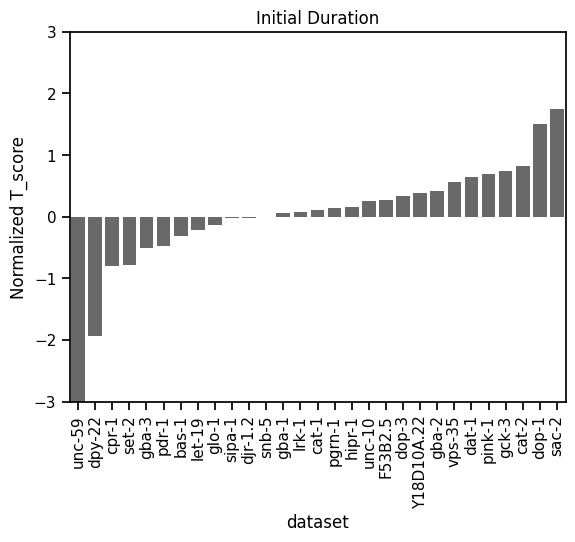

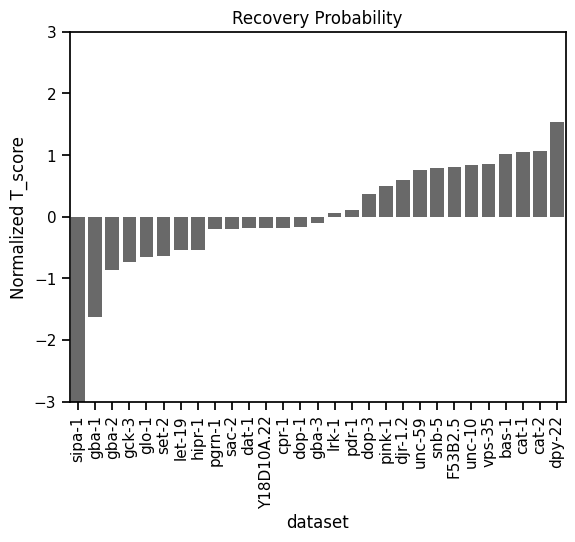

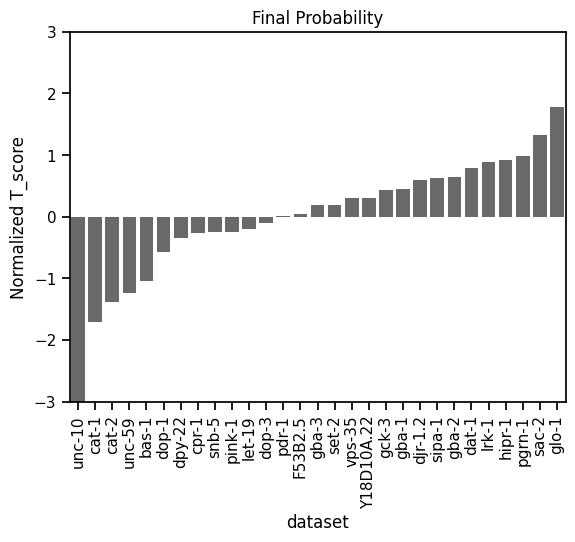

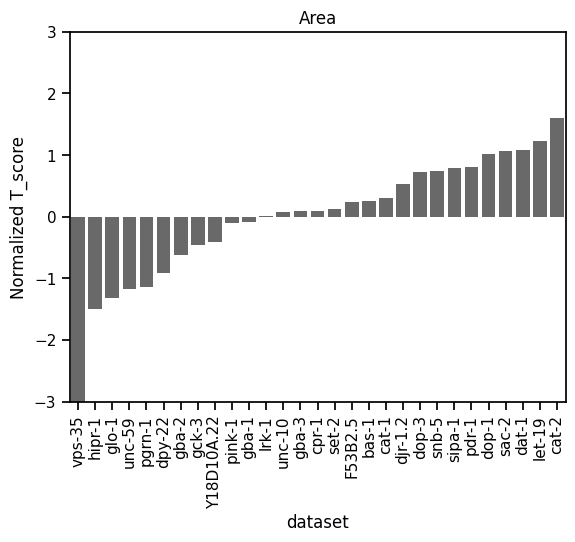

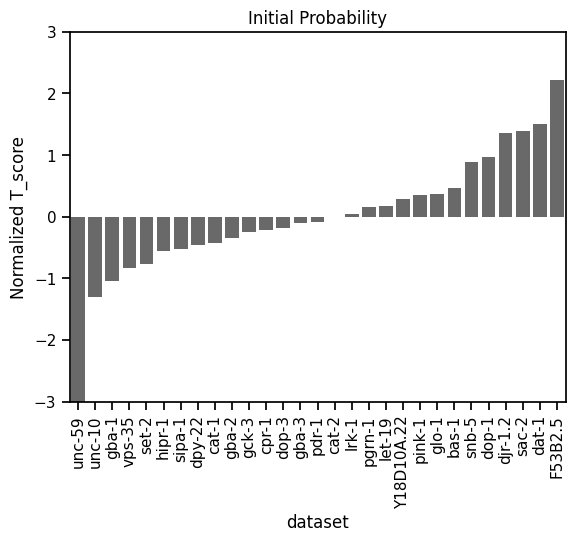

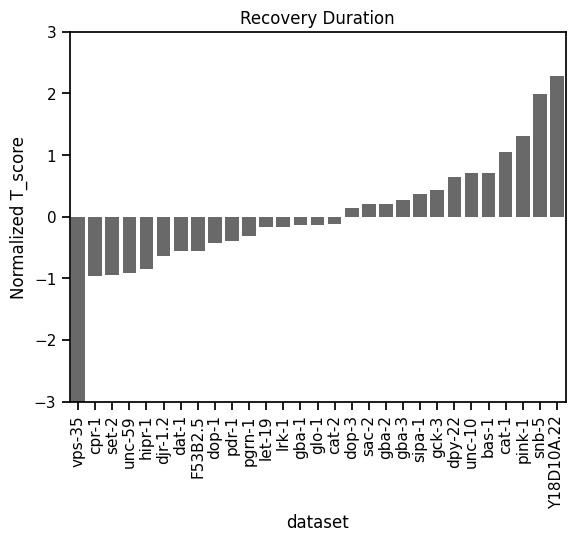

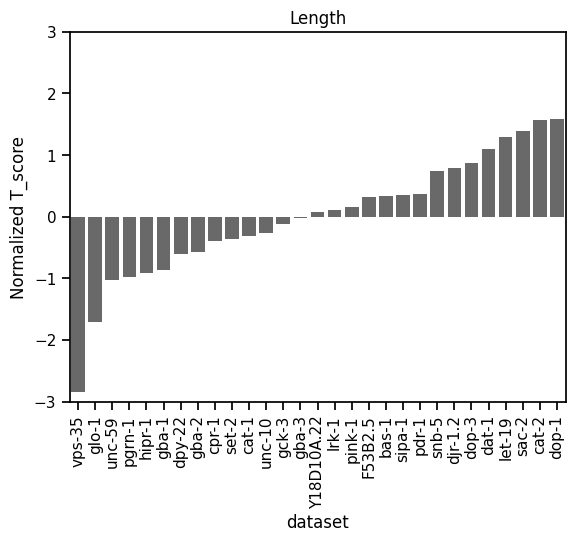

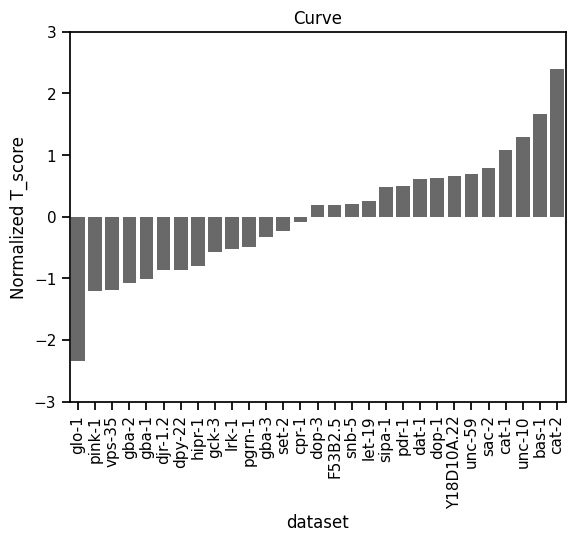

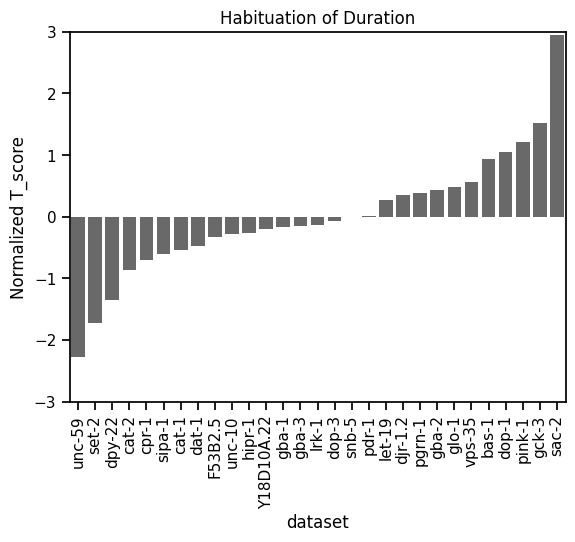

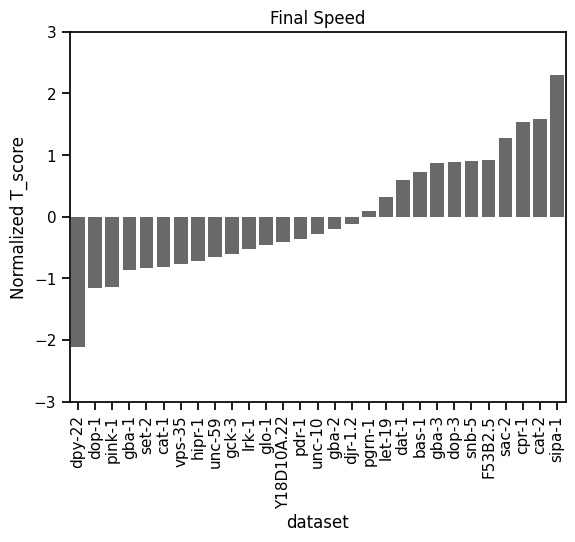

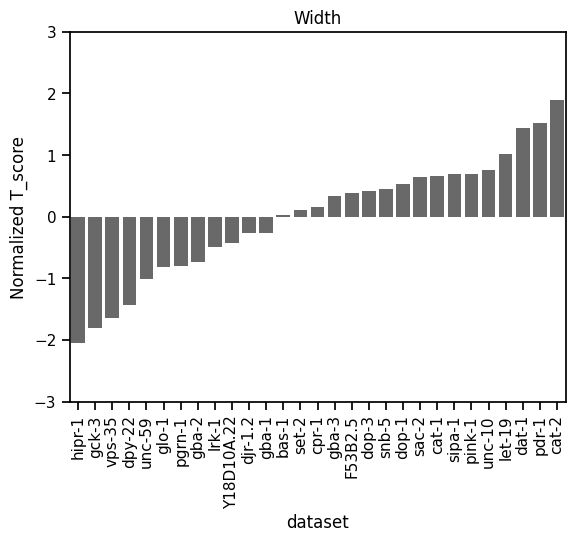

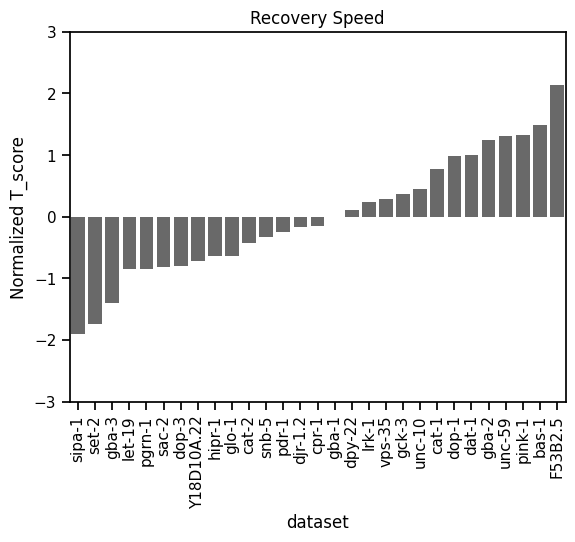

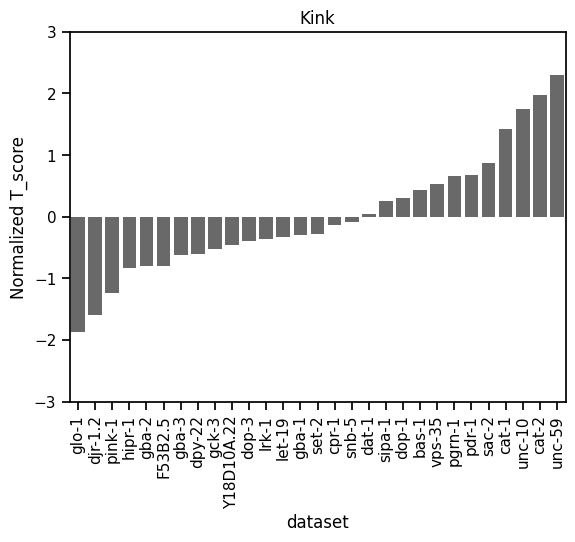

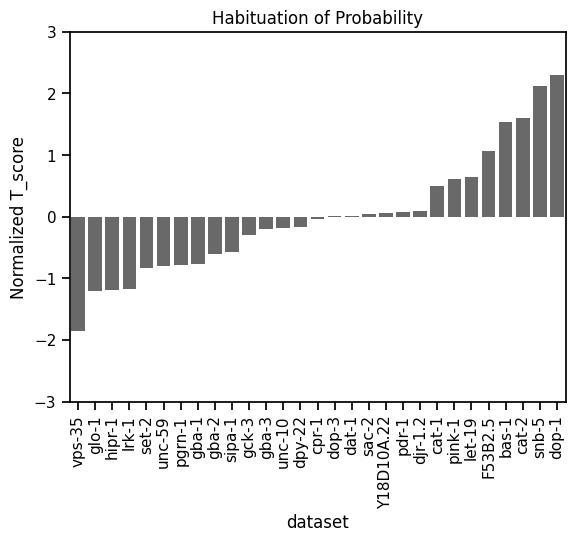

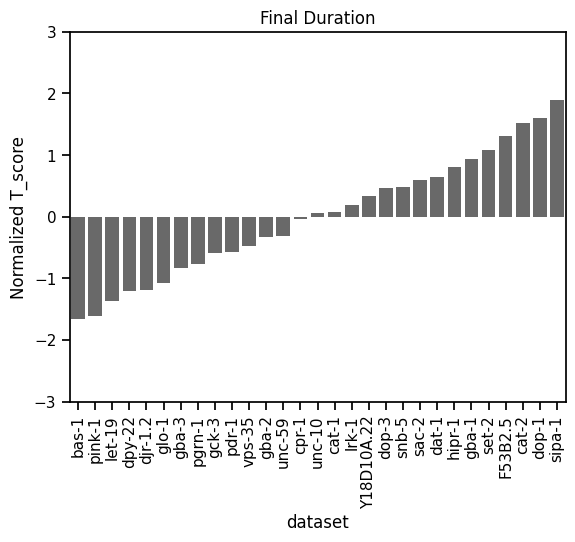

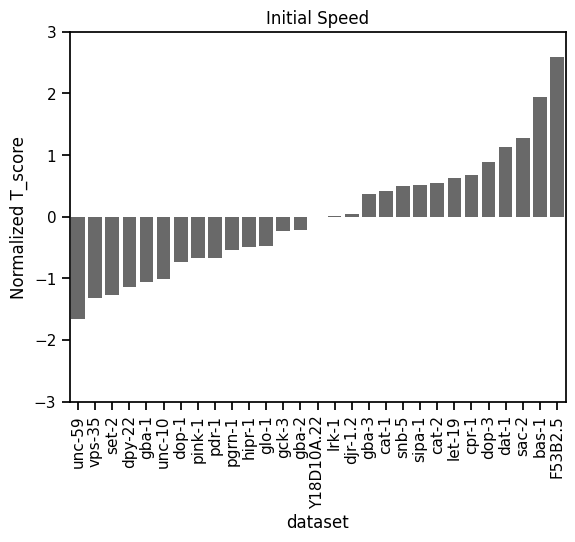

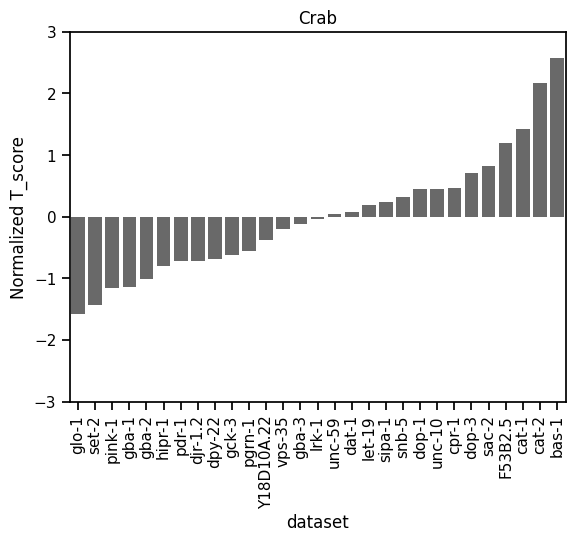

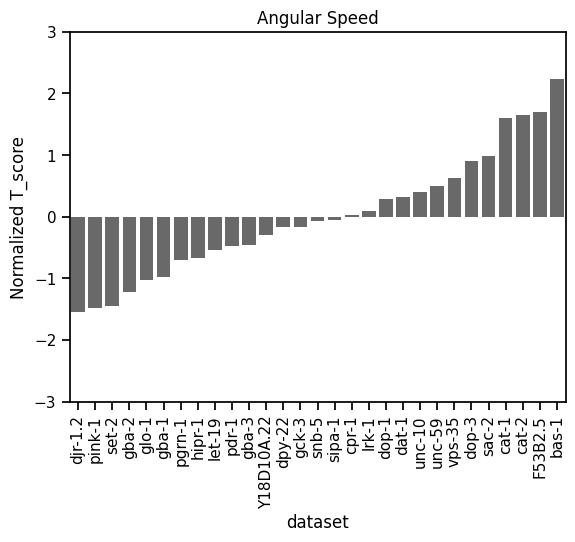

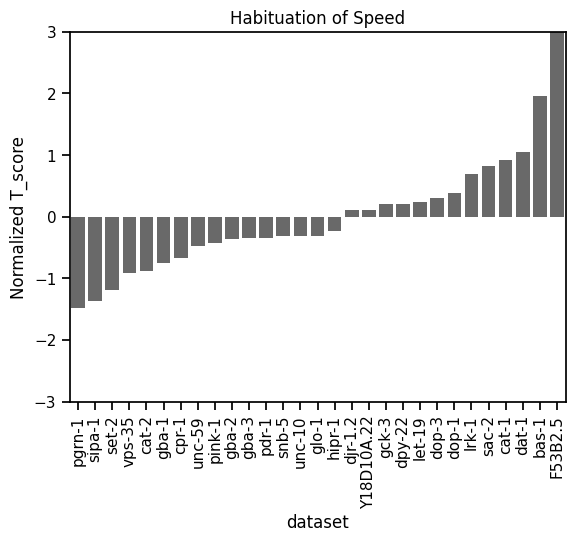

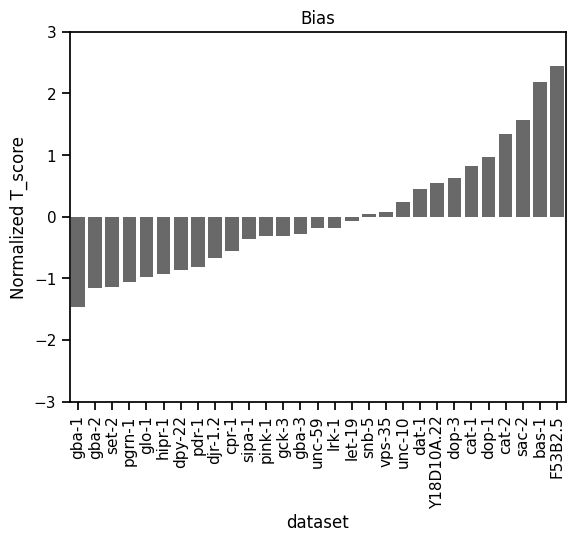

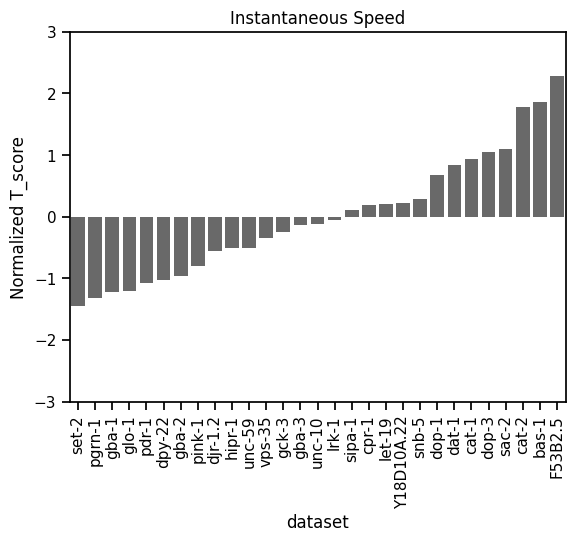

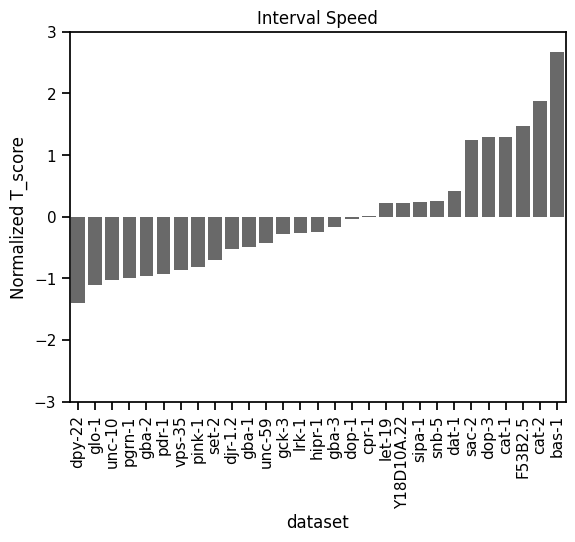

done


In [341]:
# sns.barplot(data=PD_gene_Tstats_melted_gene_sorted[PD_gene_Tstats_melted_gene_sorted.Metric=="Instantaneous Speed"],
#             x="dataset", y="T_score")
# plt.xticks(rotation=90)

for x in PD_gene_Tstats_melted_gene_sorted.Metric.unique():
    plt.figure()
    ax = sns.barplot(data = PD_gene_Tstats_melted_gene_sorted[PD_gene_Tstats_melted_gene_sorted.Metric==f"{x}"], 
                x="dataset",
                y="Normalized T_score",
                palette=["dimgray"]).set_title(f"{x}")
    plt.xticks(rotation=90)
    plt.ylim(-3,3)
    plt.savefig(f'/Users/Joseph/Desktop/PD_Screen_TapHab/Metric_Scores/{x}_Metrics.png', format='png', dpi=450, bbox_inches = "tight")
    plt.show()
print("done")

In [266]:
# print(PD_recov_taps)
# print(PD_habit_levels)
# print(PD_baseline_last100)

# Rest of the analysis starts here

In [ ]:
PD_df=pd.read_csv('/Volumes/JOSEPH/PD_Screen/output.csv')
PD_df = PD_df.iloc[: , 1:]
print(PD_df)

In [ ]:
Neuron_df = pd.read_csv('/Users/Joseph/Desktop/ScreenData/AndrewMasterAdded.csv')
ASD_df = pd.read_csv('/Users/Joseph/Desktop/ScreenData/ASDMaster.csv')

print(Neuron_df)
print(ASD_df)

Neuron_df = Neuron_df.iloc[: , 1:]
print(Neuron_df)

ASD_df = ASD_df.iloc[: , 1:]
print(ASD_df)


# Master_DF = pd.concat([Neuron_df, ASD_df])
Master_DF = pd.read_csv('/Users/Joseph/Desktop/ScreenData/MasterData.csv')
print(Master_DF)

In [ ]:
####### Save Master Data to CSV #######

Master_DF.to_csv('/Users/Joseph/Desktop/ScreenData/MasterData.csv', sep=",")

In [ ]:
Initial_PD = PD_df[PD_df.taps == 1]

print(Initial_PD)

Last3Taps = [28,29,30]
FinalTaps_PD = PD_df[PD_df.taps.isin(Last3Taps)]
print(FinalTaps_PD)




In [ ]:
Initial_Neuron = Neuron_df[Neuron_df.Taps == 1]
Initial_ASD = ASD_df[ASD_df.Taps == 1]

Last3Taps = [28,29,30]
FinalTaps_Neuron = Neuron_df[Neuron_df.Taps.isin(Last3Taps)]
FinalTaps_ASD = ASD_df[ASD_df.Taps.isin(Last3Taps)]

print(Initial_Neuron)
print(Initial_ASD)
print(FinalTaps_Neuron)
print(FinalTaps_ASD)


In [ ]:
PD_strains = dict(zip(Initial_PD.Allele, Initial_PD.Gene))
print(PD_strains)

In [ ]:
Neuron_strains = dict(zip(Initial_Neuron.Allele, Initial_Neuron.Gene))

ASD_strains = dict(zip(Initial_ASD.Allele, Initial_ASD.Gene))

print(Neuron_strains)
print(ASD_strains)

In [ ]:
PD_Alleles = PD_df["Allele"].unique()
PD_Genes = PD_df["Gene"].unique()
print(PD_Alleles)


In [ ]:
Neuron_Alleles = Neuron_df["Allele"].unique()
Neuron_Genes = Neuron_df["Gene"].unique()

ASD_Alleles = ASD_df["Allele"].unique()
ASD_Genes = ASD_df["Gene"].unique()

# print(Neuron_Alleles)
# print(Neuron_Genes)
print(ASD_Alleles)
print(ASD_Genes)

In [ ]:
PD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
PD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
PD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
PD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])

In [ ]:
Neuron_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
Neuron_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
Neuron_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
Neuron_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])
# Neuron_Init_dura_Tstat_trial = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"]) 

ASD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
ASD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
ASD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
ASD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])

# print(Initial_Neuron_Dura)

In [ ]:
def TTEST(List, Type, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        TSTAT=ttest_ind(DF_ref[DF_ref.Allele == a][Type], DF_ref[DF_ref.Allele == "N2"][Type],equal_var=False)[0]
        row = [Screen, StrainsDict.get(a), a, TSTAT]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)


In [ ]:
TTEST(PD_Alleles, "dura", "PD", PD_strains, Initial_PD, PD_Init_dura_Tstat)
TTEST(PD_Alleles, "dist", "PD", PD_strains, Initial_PD, PD_Init_dist_Tstat)
TTEST(PD_Alleles, "prob", "PD", PD_strains, Initial_PD, PD_Init_prob_Tstat)
TTEST(PD_Alleles, "speed", "PD", PD_strains, Initial_PD, PD_Init_speed_Tstat)

In [ ]:
# ASD_Init_dura_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dura_T"])
# ASD_Init_dist_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","dist_T"])
# ASD_Init_prob_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","prob_T"])
# ASD_Init_speed_Tstat = pd.DataFrame(columns = ["Screen", "Gene","Allele","speed_T"])



In [ ]:
TTEST(Neuron_Alleles, "dura", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_dura_Tstat)
TTEST(Neuron_Alleles, "dist", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_dist_Tstat)
TTEST(Neuron_Alleles, "prob", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_prob_Tstat)
TTEST(Neuron_Alleles, "speed", "Neuronal", Neuron_strains, Initial_Neuron, Neuron_Init_speed_Tstat)

In [ ]:
TTEST(ASD_Alleles, "dura", "ASD", ASD_strains, Initial_ASD, ASD_Init_dura_Tstat)
TTEST(ASD_Alleles, "dist", "ASD", ASD_strains, Initial_ASD, ASD_Init_dist_Tstat)
TTEST(ASD_Alleles, "prob", "ASD", ASD_strains, Initial_ASD, ASD_Init_prob_Tstat)
TTEST(ASD_Alleles, "speed", "ASD", ASD_strains, Initial_ASD, ASD_Init_speed_Tstat)

In [ ]:
PD_Init_TSTAT = pd.DataFrame()
PD_Init_TSTAT = PD_Init_dura_Tstat
PD_Init_TSTAT["dist_T"] = PD_Init_dist_Tstat["dist_T"]
PD_Init_TSTAT["prob_T"] = PD_Init_prob_Tstat["prob_T"]
PD_Init_TSTAT["speed_T"] = PD_Init_speed_Tstat["speed_T"]
PD_Init_TSTAT['Genotype']=PD_Init_TSTAT['Gene']+" - "+PD_Init_TSTAT['Allele']
print(PD_Init_TSTAT)

In [ ]:
Pheno = 'Speed'
PD_Init_TSTAT=PD_Init_TSTAT.sort_values(by=["speed_T"])
Title = f"Phenotype Score - {Pheno}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 1)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = 'speed_T', 
             data = PD_Init_TSTAT, #<--------------- Input Here -------------
             color = 'darkorange',
             edgecolor="darkorange",
             linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("Genotype")
plt.xticks(rotation=90)
plt.ylabel(f"T Score of {Pheno}")
# plt.ylim(top = 0.1)
# plt.ylim(bottom = -0.1)
plt.title(Title)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
Neuron_Init_TSTAT = pd.DataFrame()
Neuron_Init_TSTAT = Neuron_Init_dura_Tstat
Neuron_Init_TSTAT["dist_T"] = Neuron_Init_dist_Tstat["dist_T"]
Neuron_Init_TSTAT["prob_T"] = Neuron_Init_prob_Tstat["prob_T"]
Neuron_Init_TSTAT["speed_T"] = Neuron_Init_speed_Tstat["speed_T"]

print(Neuron_Init_TSTAT)

In [ ]:
ASD_Init_TSTAT = pd.DataFrame()
ASD_Init_TSTAT = ASD_Init_dura_Tstat
ASD_Init_TSTAT["dist_T"] = ASD_Init_dist_Tstat["dist_T"]
ASD_Init_TSTAT["prob_T"] = ASD_Init_prob_Tstat["prob_T"]
ASD_Init_TSTAT["speed_T"] = ASD_Init_speed_Tstat["speed_T"]
print(ASD_Init_TSTAT)

In [ ]:
#### T-Test ######

Neuron_Init_dura_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_dist_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_prob_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
Neuron_Init_speed_Tstat = pd.DataFrame(columns = ["Gene","Allele","T", "Screen"])
# print(Neuron_Dura_Tstat)

for a in Neuron_Alleles:
    TSTAT=ttest_ind(Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == a].dura, Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "N2"].dura,equal_var=False)[0]
    row = [Neuron_strains.get(a),a, TSTAT, "Neuronal"]
#     print(a,TSTAT)
    Neuron_Init_Dura_Tstat.loc[len(Neuron_Dura_Tstat)]=row

print(Neuron_Dura_Tstat)
    
    
    
# ttest(Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "AH102"].dura, Initial_Neuron_Dura[Initial_Neuron_Dura.Allele == "N2"].dura)["T"]

In [ ]:
Init_Ttest_Master = pd.concat([Neuron_Init_TSTAT, ASD_Init_TSTAT])
print(Init_Ttest_Master)
Init_Ttest_Master.to_csv('/Users/Joseph/Desktop/ScreenData/Init_Ttest_Master.csv', sep=",")

In [ ]:
FinalTaps_ASD.to_csv('/Users/Joseph/Desktop/ScreenData/ASD_FinalTaps.csv', sep=",")

In [ ]:
Initial_DF1 = Master_DF[Master_DF.Taps == 1]

Initial_DF = Initial_DF1.rename({"dura": "init_dura", 
                                 "dist": "init_dist", 
                                 "prob": "init_prob", 
                                 "speed": "init_speed"}, axis=1)
print(Initial_DF)
# Initial_DF.to_csv('/Users/Joseph/Desktop/ScreenData/FirstTaps.csv', sep=",")

In [ ]:
Last3Taps = [28,29,30]

FinalTaps_DF = Master_DF[Master_DF.Taps.isin(Last3Taps)]
print(FinalTaps_DF)

In [ ]:
### Calculate Mean of Final Habituated Level From 3 Taps

FinalLevels1 = FinalTaps_DF.groupby(["Gene", "Allele", "Screen", "plate"]).mean().reset_index()

FinalLevels = FinalLevels1.rename({"dura": "final_dura", 
                                   "dist": "final_dist", 
                                   "prob": "final_prob", 
                                   "speed": "final_speed"}, axis=1)

print(FinalLevels)
# FinalLevels.to_csv('/Users/Joseph/Desktop/ScreenData/FinalLevels.csv', sep=",")

In [ ]:
InitialAndFinal = pd.merge(Initial_DF,
                          FinalLevels,
                          on = ["Gene", "Allele", "plate","Screen"],
                          how = "inner")
print(InitialAndFinal)

In [ ]:
InitialAndFinal["hab_dura"]=InitialAndFinal["init_dura"]-InitialAndFinal["final_dura"]
InitialAndFinal["hab_dist"]=InitialAndFinal["init_dist"]-InitialAndFinal["final_dist"]
InitialAndFinal["hab_prob"]=InitialAndFinal["init_prob"]-InitialAndFinal["final_prob"]
InitialAndFinal["hab_speed"]=InitialAndFinal["init_speed"]-InitialAndFinal["final_speed"]
# InitialAndFinal.drop(['taps_x','taps_y','time_x', 'time_y'], axis=1, inplace=True)
print(InitialAndFinal)
# InitialAndFinal.to_csv('/Users/Joseph/Desktop/ScreenData/HabituatedLevels.csv', sep=",")


InitialAndFinal_ASD=InitialAndFinal[InitialAndFinal.Screen=='ASD']
print(InitialAndFinal_ASD)
InitialAndFinal_Neuron=InitialAndFinal[InitialAndFinal.Screen=='Neuronal']
print(InitialAndFinal_Neuron)

In [ ]:
# Testing Manually Updated Dataframe (removed blank N2 row in speed)

InitialAndFinal = pd.read_csv('/Users/Joseph/Desktop/ScreenData/HabituatedLevels_new.csv')

InitialAndFinal_ASD=InitialAndFinal[InitialAndFinal.Screen=='ASD']
print(InitialAndFinal_ASD)
InitialAndFinal_Neuron=InitialAndFinal[InitialAndFinal.Screen=='Neuronal']
print(InitialAndFinal_Neuron)

In [ ]:
def TTEST_new_equalvar(List, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        T_init_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dura"], DF_ref[DF_ref.Allele == "N2"]["init_dura"],equal_var=True)[0]
        T_init_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dist"], DF_ref[DF_ref.Allele == "N2"]["init_dist"],equal_var=True)[0]
        T_init_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["init_prob"], DF_ref[DF_ref.Allele == "N2"]["init_prob"],equal_var=True)[0]
        T_init_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["init_speed"], DF_ref[DF_ref.Allele == "N2"]["init_speed"],equal_var=True)[0]
        
        T_final_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dura"], DF_ref[DF_ref.Allele == "N2"]["final_dura"],equal_var=True)[0]
        T_final_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dist"], DF_ref[DF_ref.Allele == "N2"]["final_dist"],equal_var=True)[0]
        T_final_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["final_prob"], DF_ref[DF_ref.Allele == "N2"]["final_prob"],equal_var=True)[0]
        T_final_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["final_speed"], DF_ref[DF_ref.Allele == "N2"]["final_speed"],equal_var=False)[0]
        
        T_hab_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dura"], DF_ref[DF_ref.Allele == "N2"]["hab_dura"],equal_var=True)[0]
        T_hab_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dist"], DF_ref[DF_ref.Allele == "N2"]["hab_dist"],equal_var=True)[0]
        T_hab_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_prob"], DF_ref[DF_ref.Allele == "N2"]["hab_prob"],equal_var=True)[0]
        T_hab_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_speed"], DF_ref[DF_ref.Allele == "N2"]["hab_speed"],equal_var=True)[0]
        row = [Screen,
               StrainsDict.get(a),
               a,
               T_init_dura,
               T_init_dist,
               T_init_prob,
               T_init_speed,
               T_final_dura,
               T_final_dist,
               T_final_prob,
               T_final_speed,
               T_hab_dura,
               T_hab_dist,
               T_hab_prob,
               T_hab_speed]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)
    
def TTEST_new_noequalvar(List, Screen, StrainsDict, DF_ref, DF_out):
    for a in List:
        T_init_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dura"], DF_ref[DF_ref.Allele == "N2"]["init_dura"],equal_var=False)[0]
        T_init_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["init_dist"], DF_ref[DF_ref.Allele == "N2"]["init_dist"],equal_var=False)[0]
        T_init_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["init_prob"], DF_ref[DF_ref.Allele == "N2"]["init_prob"],equal_var=False)[0]
        T_init_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["init_speed"], DF_ref[DF_ref.Allele == "N2"]["init_speed"],equal_var=False)[0]
        
        T_final_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dura"], DF_ref[DF_ref.Allele == "N2"]["final_dura"],equal_var=False)[0]
        T_final_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["final_dist"], DF_ref[DF_ref.Allele == "N2"]["final_dist"],equal_var=False)[0]
        T_final_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["final_prob"], DF_ref[DF_ref.Allele == "N2"]["final_prob"],equal_var=False)[0]
        T_final_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["final_speed"], DF_ref[DF_ref.Allele == "N2"]["final_speed"],equal_var=False)[0]
        
        T_hab_dura=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dura"], DF_ref[DF_ref.Allele == "N2"]["hab_dura"],equal_var=False)[0]
        T_hab_dist=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_dist"], DF_ref[DF_ref.Allele == "N2"]["hab_dist"],equal_var=False)[0]
        T_hab_prob=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_prob"], DF_ref[DF_ref.Allele == "N2"]["hab_prob"],equal_var=False)[0]
        T_hab_speed=ttest_ind(DF_ref[DF_ref.Allele == a]["hab_speed"], DF_ref[DF_ref.Allele == "N2"]["hab_speed"],equal_var=False)[0]
        row = [Screen,
               StrainsDict.get(a),
               a,
               T_init_dura,
               T_init_dist,
               T_init_prob,
               T_init_speed,
               T_final_dura,
               T_final_dist,
               T_final_prob,
               T_final_speed,
               T_hab_dura,
               T_hab_dist,
               T_hab_prob,
               T_hab_speed]
        DF_out.loc[len(DF_out)]=row
    print(DF_out)

In [ ]:
Tstat_Master_ASD = pd.DataFrame(columns = ["Screen",
                                           "Gene",
                                           "Allele",
                                           "T_init_dura",
                                           "T_init_dist",
                                           "T_init_prob",
                                           "T_init_speed",
                                           "T_final_dura",
                                           "T_final_dist",
                                           "T_final_prob",
                                           "T_final_speed",
                                           "T_hab_dura",
                                           "T_hab_dist",
                                           "T_hab_prob",
                                           "T_hab_speed"])
Tstat_Master_Neuron = pd.DataFrame(columns = ["Screen",
                                           "Gene",
                                           "Allele",
                                           "T_init_dura",
                                           "T_init_dist",
                                           "T_init_prob",
                                           "T_init_speed",
                                           "T_final_dura",
                                           "T_final_dist",
                                           "T_final_prob",
                                           "T_final_speed",
                                           "T_hab_dura",
                                           "T_hab_dist",
                                           "T_hab_prob",
                                           "T_hab_speed"])

In [ ]:
TTEST_new_noequalvar(ASD_Alleles, "ASD", ASD_strains, InitialAndFinal_ASD, Tstat_Master_ASD)
TTEST_new_noequalvar(Neuron_Alleles, "Neuronal", Neuron_strains, InitialAndFinal_Neuron, Tstat_Master_Neuron)

In [ ]:
Tstat_Master = pd.concat([Tstat_Master_ASD,Tstat_Master_Neuron])
print(Tstat_Master)
# Tstat_Master.to_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master.csv', sep=",")

In [ ]:
Tstat_Master = pd.read_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master.csv')
Tstat_Master_copy = pd.read_csv('/Users/Joseph/Desktop/ScreenData/Tstat_Master_copy.csv')
Tstat_Master_copy = Tstat_Master_copy.iloc[: , 1:]
print(Tstat_Master_copy)

In [ ]:
import chart_studio.plotly as py
import chart_studio

## Connect with chartstudio
username = 'JosephLiangUBC' # Add your username
api_key = 'ZASGSzLhSTdvXdzCZplK' # Add your api key 

chart_studio.tools.set_credentials_file(username = username, api_key = api_key)

In [ ]:
AxisNames = {
    "T_init_dura": "Initial Response Duration",
    "T_init_dist": "Initial Response Distance",
    "T_init_prob": "Initial Response Probability",
    "T_init_speed": "Initial Response Speed",
    "T_final_dura": "Final Response Duration",
    "T_final_dist": "Final Response Distance",
    "T_final_prob": "Final Response Probability",
    "T_final_speed": "Final Response Speed",
    "T_hab_dura": "Degree of Habituation of Response Duration",
    "T_hab_dist": "Degree of Habituation of Response Distance",
    "T_hab_prob": "Degree of Habituation of Response Probability",
    "T_hab_speed": "Degree of Habituation of Response Speed",
}


In [ ]:
import plotly.express as px
df = Tstat_Master # iris is a pandas DataFrame
fig = px.scatter(df, 
                 x="T_hab_prob", 
                 y="T_init_prob", 
                 color="Screen", 
                 labels=AxisNames,
                 opacity=0.65,
                 color_discrete_sequence=["black", "red"],
                 hover_name="Gene", 
                 trendline = "ols",
                 marginal_x = "histogram",
                 marginal_y = "histogram",
                 hover_data=['Allele'])
fig.show()

In [ ]:
py.plot(fig, filename = 'Initial_vs_Habituated_Probability', auto_open=True)

In [ ]:
Corr_ASD = Tstat_Master_ASD.corr()
Corr_Neuron = Tstat_Master_Neuron.corr()
Corr_Master = Tstat_Master.corr()
print(Corr_ASD)
print(Corr_Neuron)

In [ ]:
import seaborn as sns
sns.set_context("poster")
f,(ax1,ax2,axcb) = plt.subplots(1,3, 
            gridspec_kw={'width_ratios':[1,1,0.08]}, figsize = (15,7))
ax1.get_shared_y_axes().join(ax2)
f.suptitle('Correlations between T-scores of Different Response Habituation Components')
g1 = sns.heatmap(Corr_Neuron,cmap="crest",cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel("Andrew's Screen")
g2 = sns.heatmap(Corr_ASD,cmap="crest",cbar_ax=axcb,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('ASD Screen')
g2.set_yticks([])


for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
    
plt.savefig('/Users/Joseph/Desktop/ScreenData/CorrelationPlots_Welch.png', format='png', dpi=450, bbox_inches = 'tight')

In [ ]:
fig = px.imshow(Corr_Master)
fig.show()

In [ ]:
fig = px.imshow(Corr_ASD, labels=AxisNames)
fig.show()

In [ ]:
fig = px.imshow(Corr_Neuron)
fig.show()

In [ ]:
fig = px.imshow(Corr_Master)
fig.show()

In [ ]:
from bokeh.io import show
from bokeh.models import CustomJS, Select


In [ ]:

select = Select(title="Option:", value="foo", options=["foo", "bar", "baz", "quux"])
select.js_on_change("value", CustomJS(code="""
    console.log('select: value=' + this.value, this.toString())
"""))

show(select)